# Data Cleaning

In [ ]:
import pandas as pd

In [ ]:
def_df = pd.read_csv("/Users/alyssaliu/Desktop/StatsM148/Event Definitions.csv")
df = pd.read_csv("/Users/alyssaliu/Desktop/StatsM148/export.csv")

In [ ]:
def_df

,event_name,journey_id,event_definition_id,milestone_number,stage
0,application_phone_approved,1,15,1.0,Apply for Credit
1,application_phone_declined,1,16,NaN,Apply for Credit
2,application_phone_pending,1,17,NaN,Apply for Credit
3,application_web_approved,1,12,1.0,Apply for Credit
4,application_web_declined,1,13,NaN,Apply for Credit
5,application_web_pending,1,14,NaN,Apply for Credit
6,application_web_submit,1,3,NaN,Apply for Credit
7,application_web_view,1,19,NaN,Apply for Credit
8,account_activitation,1,29,3.0,Credit Account
9,account_fraud_review,1,37,NaN,Credit Account


In [ ]:
print(df.shape)
df.head()

(64911906, 6)


,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end
0,-784961211,1773350293,12,application_web_approved,2023-03-22T08:45:22.000Z,1
1,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,2
2,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,3
3,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,4
4,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,5


In [ ]:
df['event_timestamp'] = pd.to_datetime(df['event_timestamp']) # convert to pd datetime

## First deal with removing duplicate events

Ben said these could be ignored

In [ ]:
# remove duplicate rows - don't factor in journey_steps_until_end because this counts up even for duplicate rows
df_dropped = df.drop(['journey_steps_until_end'], axis = 1)
df_dropped = df_dropped.drop_duplicates()
# df_dropped = df.drop(['journey_steps_until_end'], axis = 1)
df_dropped.head(10)

,customer_id,account_id,ed_id,event_name,event_timestamp
0,-784961211,1773350293,12,application_web_approved,2023-03-22 08:45:22+00:00
1,-784961211,1773350293,19,application_web_view,2023-03-22 13:32:10+00:00
14,-784961211,1773350293,3,application_web_submit,2023-03-22 13:32:10+00:00
15,-784961211,1773350293,2,campaign_click,2023-03-22 14:45:22+00:00
16,-784961211,1773350293,19,application_web_view,2023-07-27 14:57:56+00:00
21,-784961211,1773350293,19,application_web_view,2023-08-29 16:01:06+00:00
24,15849251,383997507,4,browse_products,2021-11-04 14:11:15+00:00
25,15849251,383997507,4,browse_products,2021-11-04 14:11:29+00:00
26,15849251,383997507,4,browse_products,2021-11-04 14:12:10+00:00
27,15849251,383997507,4,browse_products,2021-11-04 14:12:21+00:00


In [ ]:
print(df_dropped.shape)
df.shape[0] - df_dropped.shape[0] # number of duplicate rows removed ~8 million

(56853035, 5)


8058871

In [ ]:
df_dropped['journey_steps_until_end'] = df_dropped.groupby(['customer_id', 'account_id']).cumcount() + 1 # add journey_steps_until_end back in

In [ ]:
df_dropped.reset_index(drop=True, inplace=True)
df_dropped.head(10)

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end
0,-784961211,1773350293,12,application_web_approved,2023-03-22 08:45:22+00:00,1
1,-784961211,1773350293,19,application_web_view,2023-03-22 13:32:10+00:00,2
2,-784961211,1773350293,3,application_web_submit,2023-03-22 13:32:10+00:00,3
3,-784961211,1773350293,2,campaign_click,2023-03-22 14:45:22+00:00,4
4,-784961211,1773350293,19,application_web_view,2023-07-27 14:57:56+00:00,5
5,-784961211,1773350293,19,application_web_view,2023-08-29 16:01:06+00:00,6
6,15849251,383997507,4,browse_products,2021-11-04 14:11:15+00:00,1
7,15849251,383997507,4,browse_products,2021-11-04 14:11:29+00:00,2
8,15849251,383997507,4,browse_products,2021-11-04 14:12:10+00:00,3
9,15849251,383997507,4,browse_products,2021-11-04 14:12:21+00:00,4


In [ ]:
df_dropped.dtypes

customer_id                              int64
account_id                               int64
ed_id                                    int64
event_name                              object
event_timestamp            datetime64[ns, UTC]
journey_steps_until_end                  int64
dtype: object

## Look into removing incomplete customers

Determining whether a customer is unsuccessful (quit) or incomplete (the data was just cut off, so we don't know if they ended up having a successful journey or not) 

according to Ben: it is a bit tricky to know if it’s a ‘quit’ or an ‘incomplete’.  What we typically look for is 60+ days since an approval, after that point we have VERY few people order if they haven’t yet.  Here’s our activation curve as of late as an example:

![Image Description](cum_activation.png)

I will create a dataframe for customers who have had 70+ days since activation - to weed out incomplete customers

In [ ]:
# get count of account_activations for each customer/account pair
activation_counts = df_dropped.groupby(['customer_id', 'account_id'])['event_name'].apply(lambda x: x.str.count('account_activitation').sum())
activation_counts

customer_id  account_id 
-2147483541   2059949086    0
-2147481037  -1245770865    0
-2147474335  -1929965268    1
-2147474305   1098145658    0
-2147472167   889210381     1
                           ..
 2147480051  -148210516     0
 2147480182  -1286764612    0
 2147480920   496493954     0
 2147482120  -488077144     0
 2147483471   1556733004    0
Name: event_name, Length: 1735767, dtype: int64

In [ ]:
# get count of account_activation occurrences
activation_counts.value_counts()

event_name
0    1319326
1     414268
2       2013
3        160
Name: count, dtype: int64

In [ ]:
# just get those with multiple activations
multiple_activations = activation_counts[activation_counts > 1]
multiple_activations.value_counts()

event_name
2    2013
3     160
Name: count, dtype: int64

In [ ]:
mult_act_cust = list(multiple_activations.index) # list of tuples of (customer_id, account_id) with multiple activations

# create the filter for dataframe rows that correspond to customers with multiple activations
filt = ~df_dropped.apply(lambda row: (row['customer_id'], row['account_id']) in mult_act_cust, axis=1)
df_filtered = df_dropped[filt] # remove customers with multiple activations

In [ ]:
df_filtered

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end
0,-784961211,1773350293,12,application_web_approved,2023-03-22 08:45:22+00:00,1
1,-784961211,1773350293,19,application_web_view,2023-03-22 13:32:10+00:00,2
2,-784961211,1773350293,3,application_web_submit,2023-03-22 13:32:10+00:00,3
3,-784961211,1773350293,2,campaign_click,2023-03-22 14:45:22+00:00,4
4,-784961211,1773350293,19,application_web_view,2023-07-27 14:57:56+00:00,5
...,...,...,...,...,...,...
56853030,-865005459,-983311387,29,account_activitation,2021-05-14 00:00:00+00:00,39
56853031,-865005459,-983311387,5,view_cart,2021-05-15 09:27:47+00:00,40
56853032,-865005459,-983311387,24,campaignemail_clicked,2021-05-15 14:27:33+00:00,41
56853033,-865005459,-983311387,27,account_downpaymentcleared,2021-05-16 00:00:00+00:00,42


#### Now check account_activation counts - should all be either 1 or 0

In [ ]:
# now make sure all remaining customer/account combinations have only 0 or 1 account_activations
df_filtered.groupby(['customer_id', 'account_id'])['event_name'].apply(lambda x: x.str.count('account_activitation').sum()).value_counts()

event_name
0    1319326
1     414268
Name: count, dtype: int64

#### It seems that multiple account activations just indicates multiple journeys under the same customer_id and account_id which is interesting

Because such a small portion of data was removed by removing customer with multiple activations, we will proceed with df_filtered

In [ ]:
df_dropped[['customer_id', 'account_id']].drop_duplicates().shape # 1735767 unique combinations of customer/account id

(1735767, 2)

In [ ]:
print(2173 / 1735767) # 0.001% of customer/account combinations would be removed if we removed those with multiple account activations
238751 / df_dropped.shape[0] # 0.4% of dataset would be dropped if we removed customers with multiple activations

0.0012518961358292905


0.004199441595334356

Because such a small portion of the dataset has multiple activations, we will drop these rows for simplicity and for the sake of keeping the data uniform.

We will proceed with attempting to remove "incomplete" customers in the data

In [ ]:
df_filtered

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end
0,-784961211,1773350293,12,application_web_approved,2023-03-22 08:45:22+00:00,1
1,-784961211,1773350293,19,application_web_view,2023-03-22 13:32:10+00:00,2
2,-784961211,1773350293,3,application_web_submit,2023-03-22 13:32:10+00:00,3
3,-784961211,1773350293,2,campaign_click,2023-03-22 14:45:22+00:00,4
4,-784961211,1773350293,19,application_web_view,2023-07-27 14:57:56+00:00,5
...,...,...,...,...,...,...
56853030,-865005459,-983311387,29,account_activitation,2021-05-14 00:00:00+00:00,39
56853031,-865005459,-983311387,5,view_cart,2021-05-15 09:27:47+00:00,40
56853032,-865005459,-983311387,24,campaignemail_clicked,2021-05-15 14:27:33+00:00,41
56853033,-865005459,-983311387,27,account_downpaymentcleared,2021-05-16 00:00:00+00:00,42


### Before proceeding with turning data into wide format, first add 'stage' column based on definition df

In [ ]:
stage_dict = {'Apply for Credit' : 1, 'Credit Account' : 2, 'Discover' : 3, 'Downpayment' : 4, 'First Purchase' : 5, 
              'Order Shipped' : 6, 'Prospecting' : 7} # create dict to map stage to int
def_df['stage_int'] = def_df['stage'].map(stage_dict)

In [ ]:
def_df.sort_values('event_definition_id')


,event_name,journey_id,event_definition_id,milestone_number,stage,stage_int
10,campaign_click,1,2,NaN,Discover,3
6,application_web_submit,1,3,NaN,Apply for Credit,1
21,browse_products,1,4,NaN,First Purchase,5
24,view_cart,1,5,NaN,First Purchase,5
20,begin_checkout,1,6,NaN,First Purchase,5
23,place_order_web,1,7,2.0,First Purchase,5
17,place_downpayment,1,8,4.0,Downpayment,4
11,customer_requested_catalog_digital,1,9,NaN,Discover,3
12,fingerhut_university,1,10,NaN,Discover,3
19,add_to_cart,1,11,NaN,First Purchase,5


In [ ]:
event_dict = def_df.set_index('event_definition_id')['stage'].to_dict()

# these are missing, so manually assign them
event_dict[1] = 'Promotion Created'
event_dict[24] = 'Campaignemail Clicked'

In [ ]:
event_dict

{15: 'Apply for Credit',
 16: 'Apply for Credit',
 17: 'Apply for Credit',
 12: 'Apply for Credit',
 13: 'Apply for Credit',
 14: 'Apply for Credit',
 3: 'Apply for Credit',
 19: 'Apply for Credit',
 29: 'Credit Account',
 37: 'Credit Account',
 2: 'Discover',
 9: 'Discover',
 10: 'Discover',
 22: 'Discover',
 23: 'Discover',
 27: 'Downpayment',
 26: 'Downpayment',
 8: 'Downpayment',
 25: 'Downpayment',
 11: 'First Purchase',
 6: 'First Purchase',
 4: 'First Purchase',
 18: 'First Purchase',
 7: 'First Purchase',
 5: 'First Purchase',
 28: 'Order Shipped',
 20: 'Prospecting',
 21: 'Prospecting',
 1: 'Promotion Created',
 24: 'Campaignemail Clicked'}

In [ ]:
df_filtered['stage'] = df_filtered['ed_id'].map(event_dict)
df_filtered

/var/folders/x3/sb0g2l5d0bx050hnt31710zw0000gn/T/ipykernel_4719/3952731588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['stage'] = df_filtered['ed_id'].map(event_dict)


,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end,stage
0,-784961211,1773350293,12,application_web_approved,2023-03-22 08:45:22+00:00,1,Apply for Credit
1,-784961211,1773350293,19,application_web_view,2023-03-22 13:32:10+00:00,2,Apply for Credit
2,-784961211,1773350293,3,application_web_submit,2023-03-22 13:32:10+00:00,3,Apply for Credit
3,-784961211,1773350293,2,campaign_click,2023-03-22 14:45:22+00:00,4,Discover
4,-784961211,1773350293,19,application_web_view,2023-07-27 14:57:56+00:00,5,Apply for Credit
...,...,...,...,...,...,...,...
56853030,-865005459,-983311387,29,account_activitation,2021-05-14 00:00:00+00:00,39,Credit Account
56853031,-865005459,-983311387,5,view_cart,2021-05-15 09:27:47+00:00,40,First Purchase
56853032,-865005459,-983311387,24,campaignemail_clicked,2021-05-15 14:27:33+00:00,41,Campaignemail Clicked
56853033,-865005459,-983311387,27,account_downpaymentcleared,2021-05-16 00:00:00+00:00,42,Downpayment


In [ ]:
df_filtered['stage'].isna().sum()

0

## Now onto data cleaning - turning data into wide format

In [ ]:
# Group by 'customer_id' and aggregate the other columns into lists
df_grouped_cust_acct = df_filtered.groupby(['customer_id', 'account_id']).agg({
    'ed_id': list,
    'event_name': list,
    'event_timestamp': list,
    'journey_steps_until_end': list,
    'stage' : list
}).reset_index()

## add rows on account activation status

In [ ]:
# 1 if row activated account, 0 if not
df_grouped_cust_acct['account_activation'] = df_grouped_cust_acct['event_name'].apply(lambda x: 1 if 'account_activitation' in x else 0)

# 1 if row placed order, 0 if did not
df_grouped_cust_acct['place_order'] = df_grouped_cust_acct['event_name'].apply(lambda x: 1 if any([i in x for i in ['place_order_web', 'place_order_phone']]) else 0)

In [ ]:
activated_no_order = df_grouped_cust_acct[(df_grouped_cust_acct['account_activation'] == 1) & (df_grouped_cust_acct['place_order'] == 0)][['customer_id', 'account_id']]
activated_no_order

,customer_id,account_id
69,-2147329419,-1587820208
114,-2147234107,-1102522038
175,-2147056730,-1533025295
199,-2146996802,83798101
204,-2146993185,-118642405
...,...,...
1733363,2146935684,1733407043
1733367,2146940656,611604413
1733379,2146976771,1091209054
1733438,2147102719,-1080561934


### Now proceed with removing incomplete customers - those who activated within the last 60 days

In [ ]:
cutoff_date = df_dropped['event_timestamp'].max() # extract last date in dataset

activation_events = df_filtered[df_filtered['event_name'] == 'account_activitation'] # get account activations

# Merge to keep only activation events where the order wasn't shipped
df_merged = activation_events.merge(activated_no_order, on=['customer_id', 'account_id'])

# Group by 'customer_id' and 'account_id' to find the latest activation timestamp for each
activation_times = df_merged.groupby(['customer_id', 'account_id'])['event_timestamp'].max().reset_index()

# Calculate the number of days since activation for each customer/account pair
activation_times['days_since_activation'] = (cutoff_date - activation_times['event_timestamp']).dt.days

# Filter out rows where 'days_since_activation' is greater than 60
incomplete_cust_df = activation_times[activation_times['days_since_activation'] <= 60]

In [ ]:
cutoff_date

Timestamp('2023-09-20 12:29:58+0000', tz='UTC')

In [ ]:
incomplete_cust_df

,customer_id,account_id,event_timestamp,days_since_activation
39,-2144776994,-151636995,2023-09-08 00:00:00+00:00,12
54,-2144107130,252180205,2023-09-13 00:00:00+00:00,7
66,-2143223728,939055895,2023-08-09 00:00:00+00:00,42
75,-2142610706,-1264783980,2023-07-25 00:00:00+00:00,57
82,-2142222132,1186915905,2023-09-03 00:00:00+00:00,17
...,...,...,...,...
57900,2143801624,1066585907,2023-09-08 00:00:00+00:00,12
57911,2144649474,878261980,2023-09-17 00:00:00+00:00,3
57914,2144844060,958270163,2023-08-14 00:00:00+00:00,37
57917,2145083814,754007432,2023-08-18 00:00:00+00:00,33


In [ ]:
incomplete_cust = set(zip(incomplete_cust_df['customer_id'], incomplete_cust_df['account_id']))
cleaned_df = df_grouped_cust_acct[~df_grouped_cust_acct.apply(lambda row: (row['customer_id'], row['account_id']) in incomplete_cust, axis=1)]
cleaned_df

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end,stage,account_activation,place_order
0,-2147483541,2059949086,"[12, 5, 4, 11, 5, 6, 1, 4, 11, 4, 11, 5, 6, 5,...","[application_web_approved, view_cart, browse_p...","[2021-10-05 08:11:26+00:00, 2021-10-05 08:17:1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Apply for Credit, First Purchase, First Purch...",0,0
1,-2147481037,-1245770865,"[12, 1, 2, 5, 11, 4, 6]","[application_web_approved, promotion_created, ...","[2023-08-26 12:08:34+00:00, 2023-08-26 17:18:4...","[1, 2, 3, 4, 5, 6, 7]","[Apply for Credit, Promotion Created, Discover...",0,0
2,-2147474335,-1929965268,"[2, 12, 19, 3, 4, 4, 19, 4, 1, 11, 4, 5, 11, 4...","[campaign_click, application_web_approved, app...","[2023-04-14 01:42:50+00:00, 2023-04-14 19:42:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Discover, Apply for Credit, Apply for Credit,...",1,1
3,-2147474305,1098145658,"[6, 19, 19, 19, 19, 19, 19, 19, 1, 4, 19, 19, ...","[begin_checkout, application_web_view, applica...","[2021-11-28 22:27:11+00:00, 2021-11-28 22:28:0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[First Purchase, Apply for Credit, Apply for C...",0,0
4,-2147472167,889210381,"[12, 19, 3, 4, 4, 1, 1, 11, 5, 4, 11, 5, 4, 6,...","[application_web_approved, application_web_vie...","[2023-02-19 08:23:54+00:00, 2023-02-19 14:21:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Apply for Credit, Apply for Credit, Apply for...",1,1
...,...,...,...,...,...,...,...,...,...
1733589,2147480051,-148210516,"[21, 22, 2, 12, 24, 1, 21, 1, 1, 21, 1, 1, 1, 1]","[catalog_(mail), pre-application_(3rd_party_af...","[2020-12-18 00:00:00+00:00, 2021-01-23 06:00:0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","[Prospecting, Discover, Discover, Apply for Cr...",0,0
1733590,2147480182,-1286764612,"[12, 2, 24, 4, 24, 24, 24, 24, 24]","[application_web_approved, campaign_click, cam...","[2023-06-22 09:44:49+00:00, 2023-06-22 15:44:4...","[1, 2, 3, 4, 5, 6, 7, 8, 9]","[Apply for Credit, Discover, Campaignemail Cli...",0,0
1733591,2147480920,496493954,"[2, 19, 19, 19, 19, 19, 19, 19, 3, 19, 12, 4, ...","[campaign_click, application_web_view, applica...","[2022-05-21 06:00:00+00:00, 2022-05-21 23:30:3...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Discover, Apply for Credit, Apply for Credit,...",0,0
1733592,2147482120,-488077144,"[12, 19, 2]","[application_web_approved, application_web_vie...","[2023-07-30 15:22:56+00:00, 2023-07-30 20:18:5...","[1, 2, 3]","[Apply for Credit, Apply for Credit, Discover]",0,0


In [ ]:
cleaned_df.to_pickle("/Users/alyssaliu/Desktop/StatsM148/cleaned_wide_format_data.pkl")

## Old wide format data

In [ ]:
# Group by 'customer_id' and aggregate the other columns into lists
df_grouped = df_dropped.groupby('customer_id').agg({
    'account_id': list,
    'ed_id': list,
    'event_name': list,
    'event_timestamp': list,
    'journey_steps_until_end': list,
}).reset_index()

In [ ]:
df_grouped.head(2)

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end
0,-2147483541,"[2059949086, 2059949086, 2059949086, 205994908...","[12, 5, 4, 11, 5, 6, 1, 4, 11, 4, 11, 5, 6, 5,...","[application_web_approved, view_cart, browse_p...","[2021-10-05 08:11:26+00:00, 2021-10-05 08:17:1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,-2147481037,"[-1245770865, -1245770865, -1245770865, -12457...","[12, 1, 2, 5, 11, 4, 6]","[application_web_approved, promotion_created, ...","[2023-08-26 12:08:34+00:00, 2023-08-26 17:18:4...","[1, 2, 3, 4, 5, 6, 7]"


In [ ]:
df_grouped.shape

(1665688, 6)

In [ ]:
df_grouped['account_id'] = df_grouped['account_id'].apply(lambda x: list(set(x)))

In [ ]:
df_grouped.head()

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end
0,-2147483541,[2059949086],"[12, 5, 4, 11, 5, 6, 1, 4, 11, 4, 11, 5, 6, 5,...","[application_web_approved, view_cart, browse_p...","[2021-10-05 08:11:26+00:00, 2021-10-05 08:17:1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,-2147481037,[-1245770865],"[12, 1, 2, 5, 11, 4, 6]","[application_web_approved, promotion_created, ...","[2023-08-26 12:08:34+00:00, 2023-08-26 17:18:4...","[1, 2, 3, 4, 5, 6, 7]"
2,-2147474335,[-1929965268],"[2, 12, 19, 3, 4, 4, 19, 4, 1, 11, 4, 5, 11, 4...","[campaign_click, application_web_approved, app...","[2023-04-14 01:42:50+00:00, 2023-04-14 19:42:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
3,-2147474305,[1098145658],"[6, 19, 19, 19, 19, 19, 19, 19, 1, 4, 19, 19, ...","[begin_checkout, application_web_view, applica...","[2021-11-28 22:27:11+00:00, 2021-11-28 22:28:0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
4,-2147472167,[889210381],"[12, 19, 3, 4, 4, 1, 1, 11, 5, 4, 11, 5, 4, 6,...","[application_web_approved, application_web_vie...","[2023-02-19 08:23:54+00:00, 2023-02-19 14:21:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


In [ ]:
df_grouped.to_pickle("wide_format_data_no_duplicates.pkl")

# Classification

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_pickle("/Users/alyssaliu/Desktop/StatsM148/cleaned_wide_format_data.pkl")

In [ ]:
print(df.shape)
df.head()

(1728485, 9)


,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end,stage,account_activation,place_order
0,-2147483541,2059949086,"[12, 5, 4, 11, 5, 6, 1, 4, 11, 4, 11, 5, 6, 5,...","[application_web_approved, view_cart, browse_p...","[2021-10-05 08:11:26+00:00, 2021-10-05 08:17:1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Apply for Credit, First Purchase, First Purch...",0,0
1,-2147481037,-1245770865,"[12, 1, 2, 5, 11, 4, 6]","[application_web_approved, promotion_created, ...","[2023-08-26 12:08:34+00:00, 2023-08-26 17:18:4...","[1, 2, 3, 4, 5, 6, 7]","[Apply for Credit, Promotion Created, Discover...",0,0
2,-2147474335,-1929965268,"[2, 12, 19, 3, 4, 4, 19, 4, 1, 11, 4, 5, 11, 4...","[campaign_click, application_web_approved, app...","[2023-04-14 01:42:50+00:00, 2023-04-14 19:42:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Discover, Apply for Credit, Apply for Credit,...",1,1
3,-2147474305,1098145658,"[6, 19, 19, 19, 19, 19, 19, 19, 1, 4, 19, 19, ...","[begin_checkout, application_web_view, applica...","[2021-11-28 22:27:11+00:00, 2021-11-28 22:28:0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[First Purchase, Apply for Credit, Apply for C...",0,0
4,-2147472167,889210381,"[12, 19, 3, 4, 4, 1, 1, 11, 5, 4, 11, 5, 4, 6,...","[application_web_approved, application_web_vie...","[2023-02-19 08:23:54+00:00, 2023-02-19 14:21:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Apply for Credit, Apply for Credit, Apply for...",1,1


In [ ]:
df.columns

Index(['customer_id', 'account_id', 'ed_id', 'event_name', 'event_timestamp',
       'journey_steps_until_end', 'stage', 'account_activation',
       'place_order'],
      dtype='object')

In [ ]:
df.dtypes

customer_id                 int64
account_id                  int64
ed_id                      object
event_name                 object
event_timestamp            object
journey_steps_until_end    object
stage                      object
account_activation          int64
place_order                 int64
dtype: object

## Examining first/last events

In [ ]:
first_events = df['event_name'].apply(lambda x: x[0] if x else None)
last_events = df['event_name'].apply(lambda x: x[-1] if x else None)

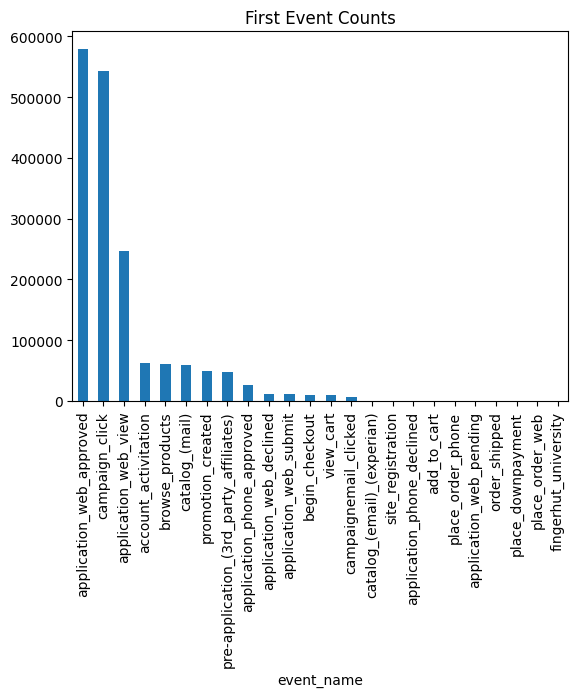

In [ ]:
first_events.value_counts().plot(kind = 'bar')
plt.title("First Event Counts")
plt.show()

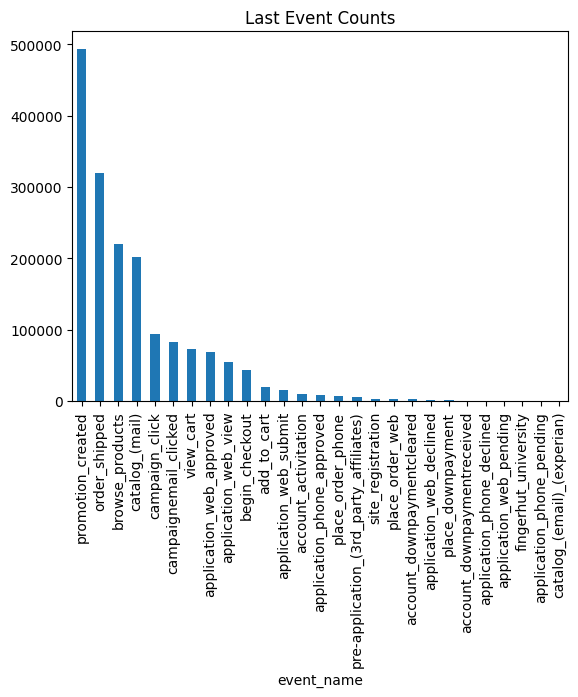

In [ ]:
last_events.value_counts().plot(kind = 'bar')
plt.title("Last Event Counts")
plt.show()

In [ ]:
df_with_orders = df[df['event_name'].apply(lambda x: 'order_shipped' in x)]

In [ ]:
print(df_with_orders.shape)
df_with_orders.head()

(321160, 9)


,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end,stage,account_activation,place_order
2,-2147474335,-1929965268,"[2, 12, 19, 3, 4, 4, 19, 4, 1, 11, 4, 5, 11, 4...","[campaign_click, application_web_approved, app...","[2023-04-14 01:42:50+00:00, 2023-04-14 19:42:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Discover, Apply for Credit, Apply for Credit,...",1,1
4,-2147472167,889210381,"[12, 19, 3, 4, 4, 1, 1, 11, 5, 4, 11, 5, 4, 6,...","[application_web_approved, application_web_vie...","[2023-02-19 08:23:54+00:00, 2023-02-19 14:21:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Apply for Credit, Apply for Credit, Apply for...",1,1
13,-2147452610,-1905163177,"[12, 1, 29, 3, 4, 11, 19, 5, 6, 7, 5, 8, 6, 8,...","[application_web_approved, promotion_created, ...","[2023-07-25 19:46:36+00:00, 2023-07-25 20:32:2...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Apply for Credit, Promotion Created, Credit A...",1,1
27,-2147425125,221594945,"[2, 19, 19, 19, 19, 19, 19, 19, 19, 19, 3, 19,...","[campaign_click, application_web_view, applica...","[2021-09-25 06:00:00+00:00, 2021-09-25 19:59:2...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Discover, Apply for Credit, Apply for Credit,...",1,1
34,-2147395611,674764100,"[29, 2, 12, 4, 4, 4, 4, 4, 11, 4, 4, 11, 4, 5,...","[account_activitation, campaign_click, applica...","[2021-06-15 00:00:00+00:00, 2021-06-15 06:00:0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Credit Account, Discover, Apply for Credit, F...",1,1


In [ ]:
df_no_orders = df[df['event_name'].apply(lambda x: 'order_shipped' not in x)]

In [ ]:
print(df_no_orders.shape)
df_no_orders.head()

(1407325, 9)


,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end,stage,account_activation,place_order
0,-2147483541,2059949086,"[12, 5, 4, 11, 5, 6, 1, 4, 11, 4, 11, 5, 6, 5,...","[application_web_approved, view_cart, browse_p...","[2021-10-05 08:11:26+00:00, 2021-10-05 08:17:1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Apply for Credit, First Purchase, First Purch...",0,0
1,-2147481037,-1245770865,"[12, 1, 2, 5, 11, 4, 6]","[application_web_approved, promotion_created, ...","[2023-08-26 12:08:34+00:00, 2023-08-26 17:18:4...","[1, 2, 3, 4, 5, 6, 7]","[Apply for Credit, Promotion Created, Discover...",0,0
3,-2147474305,1098145658,"[6, 19, 19, 19, 19, 19, 19, 19, 1, 4, 19, 19, ...","[begin_checkout, application_web_view, applica...","[2021-11-28 22:27:11+00:00, 2021-11-28 22:28:0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[First Purchase, Apply for Credit, Apply for C...",0,0
5,-2147466542,-823743386,"[12, 1, 4, 11, 5, 1, 1, 21, 1, 21, 21, 1]","[application_web_approved, promotion_created, ...","[2021-12-25 22:00:57+00:00, 2021-12-25 22:01:1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[Apply for Credit, Promotion Created, First Pu...",0,0
6,-2147466262,-296951572,"[2, 13, 19, 19, 12, 1, 4, 5, 19, 6, 3, 11, 2, 4]","[campaign_click, application_web_declined, app...","[2023-04-10 02:34:58+00:00, 2023-04-10 20:34:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","[Discover, Apply for Credit, Apply for Credit,...",0,0


### Feature Engineering

In [ ]:
def_df = pd.read_csv("/Users/alyssaliu/Desktop/StatsM148/Event Definitions.csv")
def_df

,event_name,journey_id,event_definition_id,milestone_number,stage
0,application_phone_approved,1,15,1.0,Apply for Credit
1,application_phone_declined,1,16,NaN,Apply for Credit
2,application_phone_pending,1,17,NaN,Apply for Credit
3,application_web_approved,1,12,1.0,Apply for Credit
4,application_web_declined,1,13,NaN,Apply for Credit
5,application_web_pending,1,14,NaN,Apply for Credit
6,application_web_submit,1,3,NaN,Apply for Credit
7,application_web_view,1,19,NaN,Apply for Credit
8,account_activitation,1,29,3.0,Credit Account
9,account_fraud_review,1,37,NaN,Credit Account


In [ ]:
stage_dict = {'Apply for Credit' : 1, 'Credit Account' : 2, 'Discover' : 3, 'Downpayment' : 4, 'First Purchase' : 5, 
              'Order Shipped' : 6, 'Prospecting' : 7}
def_df['stage_int'] = def_df['stage'].map(stage_dict)

In [ ]:
stage_mapping_dict = def_df.set_index('event_definition_id')['stage_int'].to_dict()

In [ ]:
sampled_df = df.sample(n=500000, replace=False)

In [ ]:
df.head(3)

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end,stage,account_activation,place_order
0,-2147483541,2059949086,"[12, 5, 4, 11, 5, 6, 1, 4, 11, 4, 11, 5, 6, 5,...","[application_web_approved, view_cart, browse_p...","[2021-10-05 08:11:26+00:00, 2021-10-05 08:17:1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Apply for Credit, First Purchase, First Purch...",0,0
1,-2147481037,-1245770865,"[12, 1, 2, 5, 11, 4, 6]","[application_web_approved, promotion_created, ...","[2023-08-26 12:08:34+00:00, 2023-08-26 17:18:4...","[1, 2, 3, 4, 5, 6, 7]","[Apply for Credit, Promotion Created, Discover...",0,0
2,-2147474335,-1929965268,"[2, 12, 19, 3, 4, 4, 19, 4, 1, 11, 4, 5, 11, 4...","[campaign_click, application_web_approved, app...","[2023-04-14 01:42:50+00:00, 2023-04-14 19:42:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Discover, Apply for Credit, Apply for Credit,...",1,1


In [ ]:
cutoff_date = pd.to_datetime('2023-09-20 12:29:58+0000', utc=True)
cutoff_date # this is like "today"

Timestamp('2023-09-20 12:29:58+0000', tz='UTC')

In [ ]:
required_stages = {'Apply for Credit', 'First Purchase', 'Downpayment', 'Order Shipped'}
promotion_ids = [2, 9, 20, 21, 1, 24]


# Function to get the stage from the first id in the list
def get_stage_from_first_id(id_list):
    # Get the first id
    first_id = id_list[0]
    # Return the corresponding stage using the mapping dictionary
    return stage_mapping_dict.get(first_id, 0)

def get_stage_from_last_id(id_list):
    # Get the first id
    last_id = id_list[-1]
    # Return the corresponding stage using the mapping dictionary
    return stage_mapping_dict.get(last_id, 0)

def clean_df(df):
    df = df.reset_index(drop = True)

    # df['event_count'] = df['event_name'].apply(len)
    # df['num_accounts'] = df['account_id'].apply(len)
    # df['unique_event_count'] = df['event_name'].apply(lambda x: len(set(x)))
    # df['unique_stage_count'] = df['stage'].apply(lambda x: len(set(x)))
    
    df['first_event'] = df['ed_id'].apply(lambda x: x[0] if x else None)
    df['days_since_start'] = df['event_timestamp'].apply(lambda x: (cutoff_date - x[0]).days)
    # df['last_event'] = df['ed_id'].apply(lambda x: x[-1] if x else None)
    # df['len_journey'] = df['journey_steps_until_end'].apply(len)
    # df['days_in_journey'] = df['event_timestamp'].apply(lambda x: (x[-1] - x[0]).days)
    # df['progression_rate'] = df['len_journey'] / df['days_in_journey'] # estimate for progression rate of journey
    df['first_stage'] = df['ed_id'].apply(get_stage_from_first_id)
    # df['last_stage'] = df['ed_id'].apply(get_stage_from_last_id)

    df['first_event_month'] = df['event_timestamp'].apply(lambda x: x[0].month)
    df['first_event_day'] = df['event_timestamp'].apply(lambda x: x[0].day)
    df['first_event_hour'] = df['event_timestamp'].apply(lambda x: x[0].hour)

    # now create columns for whether a specific event is present or not
    # remember that ideal journey is defined as: Apply for credit > Make a first purchase > Make the down payment > Order Ships
    # df already has account activation and place order one hot encoded columns
    # df['apply_for_credit'] = df['stage'].apply(lambda x: 1 if 'Apply for Credit' in x else 0) # Apply for credit
    # df['make_first_purchase'] = df['stage'].apply(lambda x: 1 if 'First Purchase' in x else 0) # first purchase
    # df['downpayment'] = df['stage'].apply(lambda x: 1 if 'Downpayment' in x else 0) # downpayment
    # df['order_shipped'] = df['event_name'].apply(lambda x: 1 if 'order_shipped' in x else 0) # order shipped

    df['ideal_journey'] = df['stage'].apply(lambda x: 1 if required_stages.issubset(set(x)) else 0)
    df['promotion_exposure'] = df['ed_id'].apply(lambda x: 1 if any([i in x for i in promotion_ids]) else 0)


    df = df.drop(['event_name', 'event_timestamp', 'ed_id', 'journey_steps_until_end', 'stage', 'place_order', 'account_activation'], axis = 1)
    
    
    return df

In [ ]:
sampled_df = clean_df(sampled_df)
whole_sampled_df = clean_df(df)

In [ ]:
sampled_df.to_pickle("/Users/alyssaliu/Desktop/StatsM148/updated_clustering_sample_df.pkl")

In [ ]:
whole_sampled_df.isna().any() # check for NA values

customer_id           False
account_id            False
first_event           False
days_since_start      False
first_stage           False
first_event_month     False
first_event_day       False
first_event_hour      False
ideal_journey         False
promotion_exposure    False
dtype: bool

In [ ]:
whole_sampled_df

,customer_id,account_id,first_event,days_since_start,first_stage,first_event_month,first_event_day,first_event_hour,ideal_journey,promotion_exposure
0,-2147483541,2059949086,12,715,1,10,5,8,0,1
1,-2147481037,-1245770865,12,25,1,8,26,12,0,1
2,-2147474335,-1929965268,2,159,3,4,14,1,1,1
3,-2147474305,1098145658,6,660,5,11,28,22,0,1
4,-2147472167,889210381,12,213,1,2,19,8,1,1
...,...,...,...,...,...,...,...,...,...,...
1728480,2147480051,-148210516,21,1006,7,12,18,0,0,1
1728481,2147480182,-1286764612,12,90,1,6,22,9,0,1
1728482,2147480920,496493954,2,487,3,5,21,6,0,1
1728483,2147482120,-488077144,12,51,1,7,30,15,0,1


In [ ]:
whole_sampled_df.to_pickle(("/Users/alyssaliu/Desktop/StatsM148/updated_feature_engineered_data.pkl"))

In [ ]:
model_df = whole_sampled_df.drop(['customer_id', 'account_id'], axis = 1)
model_df.head()

,first_event,days_since_start,first_stage,first_event_month,first_event_day,first_event_hour,ideal_journey,promotion_exposure
0,12,715,1,10,5,8,0,1
1,12,25,1,8,26,12,0,1
2,2,159,3,4,14,1,1,1
3,6,660,5,11,28,22,0,1
4,12,213,1,2,19,8,1,1


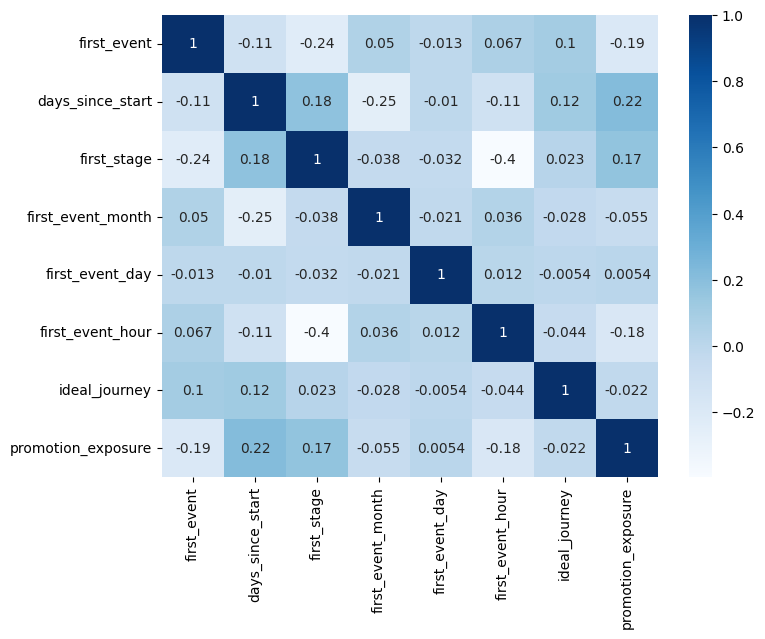

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(model_df.corr(), cmap='Blues', annot = True)
plt.show()

In [ ]:
X = model_df.drop(['ideal_journey'], axis = 1)
y = whole_sampled_df['ideal_journey'] # we use ideal_journey rather than order_shipped etc because the two variables have a correlation of 0.99

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
clf = LogisticRegression(max_iter = 10000).fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
print('accurary', accuracy)
print('precision', precision)
print('recall', recall)
print('f1', f1)

accurary 0.8172355939067428
precision 0.8306801736613604
recall 0.0054820163123412225
f1 0.010892150630473354


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
target_names = ['unsuccessful', 'successful']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

unsuccessful       0.82      1.00      0.90    465695
  successful       0.83      0.01      0.01    104706

    accuracy                           0.82    570401
   macro avg       0.82      0.50      0.46    570401
weighted avg       0.82      0.82      0.74    570401



### Now try with balanced data

In [ ]:
clf = LogisticRegression(max_iter = 10000, class_weight = 'balanced').fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

unsuccessful       0.86      0.57      0.68    465695
  successful       0.23      0.58      0.33    104706

    accuracy                           0.57    570401
   macro avg       0.55      0.58      0.51    570401
weighted avg       0.74      0.57      0.62    570401



In [ ]:
coefficients = clf.coef_[0]  
feature_importance = zip(X_train.columns, coefficients)
sorted_features = sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)
for feature, coef in sorted_features:
    print(f"{feature}: {coef}")

days_since_start: 0.36311535527275607
first_event: 0.254940458320009
promotion_exposure: -0.06274066279798429
first_event_hour: -0.056873856003187534
first_stage: 0.05520082028618418
first_event_month: 0.020378343977209792
first_event_day: -0.0026614784994115613


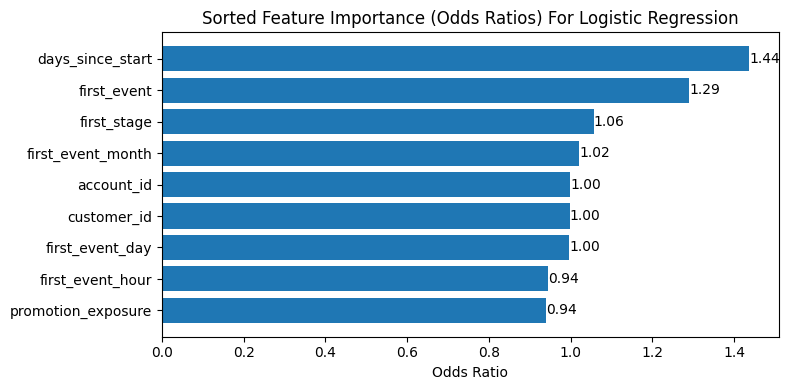

In [ ]:
odds_ratios = np.exp(coefficients)
odds_df = pd.DataFrame({'Feature': X_train.columns, 'OddsRatio': odds_ratios})
odds_df_sorted = odds_df.sort_values(by='OddsRatio', ascending=True)

plt.figure(figsize=(8, 4))
barplot = plt.barh(odds_df_sorted['Feature'], odds_df_sorted['OddsRatio'])
for bar in barplot:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
             f"{bar.get_width():.2f}", va='center')

plt.xlabel('Odds Ratio')
plt.title('Sorted Feature Importance (Odds Ratios) For Logistic Regression')
plt.tight_layout() 
plt.show()

## Try cross fold validation in case overfitting

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
model = LogisticRegression(max_iter=10000)

In [ ]:
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy') # 10 fold cv
print(f'Accuracy for each fold: {scores}')
print(f'Mean accuracy: {np.mean(scores)}')

Accuracy for each fold: [0.81761538 0.81758645 0.81758066 0.81760959 0.8177253  0.81753911
 0.81760275 0.81754489 0.81738869 0.81771267]
Mean accuracy: 0.8175905488536899


## Look into other models

first test on sample data

In [ ]:
temp = sampled_df.drop(['customer_id', 'account_id'], axis = 1)
temp.head()

,first_event,days_since_start,first_stage,first_event_month,first_event_day,first_event_hour,ideal_journey,promotion_exposure
0,19,452,1,6,25,1,0,1
1,12,299,1,11,25,8,0,1
2,12,77,1,7,4,17,0,0
3,4,291,5,12,2,14,0,1
4,2,902,3,4,1,6,0,1


In [ ]:
temp.shape

(500000, 8)

In [ ]:
X_sample = temp.drop(['ideal_journey'], axis = 1)
y_sample = temp['ideal_journey']

In [ ]:
scaler = StandardScaler()
X_sample_scaled = scaler.fit_transform(X_sample)
X_sample_scaled = pd.DataFrame(X_sample_scaled, columns=X_sample.columns)

In [ ]:
X_sample_scaled

,first_event,days_since_start,first_stage,first_event_month,first_event_day,first_event_hour,promotion_exposure
0,1.111889,-0.384390,-0.720606,-0.091906,1.064658,-1.216239,0.314428
1,0.203463,-0.911855,-0.720606,1.380873,1.064658,-0.123493,0.314428
2,0.203463,-1.677196,-0.720606,0.202650,-1.368214,1.281467,-3.180380
3,-0.834739,-0.939435,1.934916,1.675429,-1.599916,0.813147,0.314428
4,-1.094289,1.166979,0.607155,-0.681018,-1.715767,-0.435706,0.314428
...,...,...,...,...,...,...,...
499995,1.501214,1.198006,0.607155,-0.975574,0.832956,-0.435706,0.314428
499996,1.501214,-0.125828,0.607155,-0.681018,-0.557256,-0.435706,0.314428
499997,-1.094289,-0.318887,0.607155,-0.091906,-1.136511,-0.435706,0.314428
499998,-1.094289,0.732596,0.607155,0.497206,-1.252363,-0.435706,0.314428


In [ ]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(X_sample_scaled, y_sample, test_size=0.33, random_state=42)

### Logistic Regression again to just get baseline for performance on sampled data

In [ ]:
clf = LogisticRegression(max_iter = 10000).fit(X_train0, y_train0)
y_pred = clf.predict(X_test0)
accuracy = accuracy_score(y_test0, y_pred)
precision = precision_score(y_test0, y_pred)
recall = recall_score(y_test0, y_pred)
f1 = f1_score(y_test0, y_pred)

In [ ]:
print('accurary', accuracy)
print('precision', precision)
print('recall', recall)
print('f1', f1)

accurary 0.8173090909090909
precision 0.8188976377952756
recall 0.0034408602150537634
f1 0.006852925672113864


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, 
                                       min_samples_leaf=2, max_features='sqrt', n_jobs=-1, 
                                       random_state=42, class_weight = 'balanced')
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accurary', accuracy)
print('precision', precision)
print('recall', recall)
print('f1', f1)

print(classification_report(y_test, y_pred, target_names=target_names))

# setting class weight to balanced brough accuracy down from 82% to 64% but raised the other metrics significantly

accurary 0.6454757267255843
precision 0.2602864320866868
recall 0.5056252745783432
f1 0.3436620632576557
              precision    recall  f1-score   support

unsuccessful       0.86      0.68      0.76    465695
  successful       0.26      0.51      0.34    104706

    accuracy                           0.65    570401
   macro avg       0.56      0.59      0.55    570401
weighted avg       0.75      0.65      0.68    570401



In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, 
                                       min_samples_leaf=1, max_features='sqrt', n_jobs=-1, random_state=42)
scores = cross_val_score(model, X_scaled, y, cv=10, scoring='accuracy')

print(f'Accuracy for each fold: {scores}')
print(f'Mean accuracy: {np.mean(scores)}')


Accuracy for each fold: [0.81761538 0.81758645 0.81754595 0.81760959 0.8177253  0.81753911
 0.81757382 0.81753911 0.81738869 0.81771267]
Mean accuracy: 0.8175836063578046


In [ ]:
y.value_counts(normalize = True)

ideal_journey
0    0.816759
1    0.183241
Name: proportion, dtype: float64

In [ ]:
X_scaled.shape

(1728485, 7)

### Hyperparameter tuning for random forest classifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
X_sample_rf, _, y_sample_rf, _ = train_test_split(X, y, stratify=y, train_size=0.2, random_state=42)  # Sample 20% of the data

rf = RandomForestClassifier(n_jobs=-1, random_state=42, class_weight = 'balanced')
param_distributions = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20],
                       'min_samples_split': [2, 5],'min_samples_leaf': [1, 2], 'max_features': ['sqrt', 'log2']}

random_search = RandomizedSearchCV(rf, param_distributions, n_iter=10, scoring='roc_auc', cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_sample_rf, y_sample_rf)

print(f"Best parameters: {random_search.best_params_}")
print(f"Best AUC-ROC score: {random_search.best_score_}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  38.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  39.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  56.8s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  57.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  58.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 1.1min
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 1.1min
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200

### Now use best parameters from grid search cv on full dataset

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators = 200, min_samples_split = 5, min_samples_leaf = 1, max_features = 'log2', max_depth = 10,
                                       random_state=42, class_weight = 'balanced', n_jobs = -1)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accurary', accuracy)
print('precision', precision)
print('recall', recall)
print('f1', f1)

print(classification_report(y_test, y_pred, target_names=target_names))

accurary 0.6480844178043166
precision 0.2720946680400431
recall 0.5474662388019789
f1 0.36351817971393147
              precision    recall  f1-score   support

unsuccessful       0.87      0.67      0.76    465695
  successful       0.27      0.55      0.36    104706

    accuracy                           0.65    570401
   macro avg       0.57      0.61      0.56    570401
weighted avg       0.76      0.65      0.68    570401



In [ ]:
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf
from tensorflow.keras import layers

# Perform oversampling to address class imbalance
oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X_scaled, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the neural network model
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(7,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 119s 2ms/step - accuracy: 0.6007 - loss: 0.6376 - val_accuracy: 0.6047 - val_loss: 0.6341
Epoch 2/10
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 127s 2ms/step - accuracy: 0.6062 - loss: 0.6337 - val_accuracy: 0.6031 - val_loss: 0.6337
Epoch 3/10
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 127s 2ms/step - accuracy: 0.6064 - loss: 0.6329 - val_accuracy: 0.6033 - val_loss: 0.6339
Epoch 4/10
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 136s 2ms/step - accuracy: 0.6069 - loss: 0.6323 - val_accuracy: 0.6055 - val_loss: 0.6334
Epoch 5/10
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 108s 2ms/step - accuracy: 0.6069 - loss: 0.6326 - val_accuracy: 0.6038 - val_loss: 0.6338
Epoch 6/10
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 136s 2ms/step - accuracy: 0.6070 - loss: 0.6325 - val_accuracy: 0.6052 - val_loss: 0.6326
Epoch 7/10
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 115s 2ms/step - accuracy: 0.6073 - loss: 0.6322 - val_accuracy: 0.6045 - val_loss: 0.6332
Epoch 8/10
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 106s 1ms/step - ac

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define your model as before
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model as before
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Initialize the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=1e-6, verbose=1)

# Train the model with the callback
history = model.fit(
    X_train, 
    y_train, 
    epochs=50, 
    batch_size=32, 
    validation_data=(X_test, y_test),
    callbacks=[reduce_lr] 
)

Epoch 1/50
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 96s 1ms/step - accuracy: 0.6001 - loss: 0.6380 - val_accuracy: 0.6038 - val_loss: 0.6347 - learning_rate: 0.0010
Epoch 2/50
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 87s 1ms/step - accuracy: 0.6055 - loss: 0.6339 - val_accuracy: 0.6051 - val_loss: 0.6339 - learning_rate: 0.0010
Epoch 3/50
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 86s 1ms/step - accuracy: 0.6066 - loss: 0.6331 - val_accuracy: 0.6042 - val_loss: 0.6344 - learning_rate: 0.0010
Epoch 4/50
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 87s 1ms/step - accuracy: 0.6066 - loss: 0.6331 - val_accuracy: 0.6053 - val_loss: 0.6332 - learning_rate: 0.0010
Epoch 5/50
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 100s 1ms/step - accuracy: 0.6065 - loss: 0.6324 - val_accuracy: 0.6059 - val_loss: 0.6329 - learning_rate: 0.0010
Epoch 6/50
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 97s 1ms/step - accuracy: 0.6073 - loss: 0.6322 - val_accuracy: 0.6055 - val_loss: 0.6331 - learning_rate: 0.0010
Epoch 7/50
70588/70588 ━━━━━━━━━━━━━━━━━━━━ 119s 2ms/step

# Classification Visualizations

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_pickle("/Users/alyssaliu/Desktop/StatsM148/updated_feature_engineered_data.pkl")
print(df.shape)
df.head()

(1728485, 10)


,customer_id,account_id,first_event,days_since_start,first_stage,first_event_month,first_event_day,first_event_hour,ideal_journey,promotion_exposure
0,-2147483541,2059949086,12,715,1,10,5,8,0,1
1,-2147481037,-1245770865,12,25,1,8,26,12,0,1
2,-2147474335,-1929965268,2,159,3,4,14,1,1,1
3,-2147474305,1098145658,6,660,5,11,28,22,0,1
4,-2147472167,889210381,12,213,1,2,19,8,1,1


In [ ]:
def_df = pd.read_csv("/Users/alyssaliu/Desktop/StatsM148/Event Definitions.csv")

In [ ]:
df.set_index(['customer_id', 'account_id'], inplace=True)

In [ ]:
df['ideal_journey'] = df['ideal_journey'].map({0: 'unsuccessful', 1: 'successful'})


In [ ]:
df['promotion_exposure'] = df['promotion_exposure'].map({0: 'no', 1: 'yes'})


In [ ]:
stage_dict = {'Apply for Credit' : 1, 'Credit Account' : 2, 'Discover' : 3, 'Downpayment' : 4, 'First Purchase' : 5, 
              'Order Shipped' : 6, 'Prospecting' : 7}
stage_dict = {v:k for k,v in stage_dict.items()}

df['first_stage'] = df['first_stage'].map(stage_dict)

In [ ]:
df.head()

,,first_event,days_since_start,first_stage,first_event_month,first_event_day,first_event_hour,ideal_journey,promotion_exposure
customer_id,account_id,,,,,,,,
-2147483541,2059949086,12,715,Apply for Credit,10,5,8,unsuccessful,yes
-2147481037,-1245770865,12,25,Apply for Credit,8,26,12,unsuccessful,yes
-2147474335,-1929965268,2,159,Discover,4,14,1,successful,yes
-2147474305,1098145658,6,660,First Purchase,11,28,22,unsuccessful,yes
-2147472167,889210381,12,213,Apply for Credit,2,19,8,successful,yes


In [ ]:
df['ideal_journey'].value_counts(normalize = True)

ideal_journey
unsuccessful    0.816759
successful      0.183241
Name: proportion, dtype: float64

In [ ]:
df['promotion_exposure'].value_counts(normalize = True)

promotion_exposure
yes    0.910302
no     0.089698
Name: proportion, dtype: float64

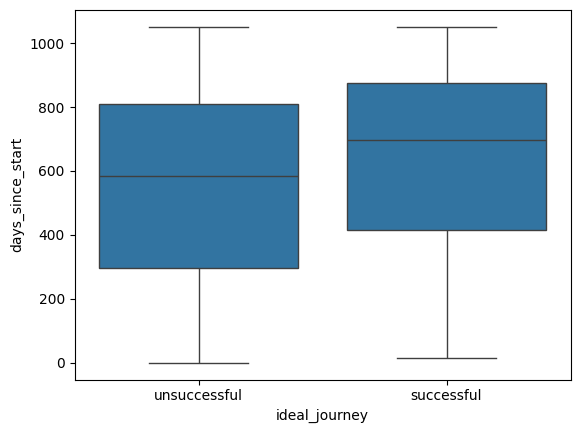

In [ ]:
sns.boxplot(data=df, x='ideal_journey', y='days_since_start')
plt.show()

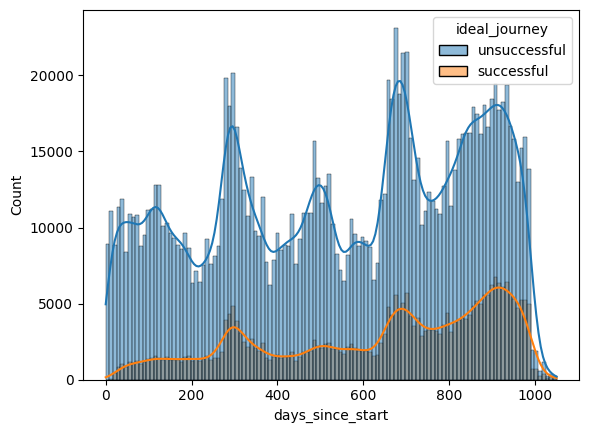

In [ ]:
sns.histplot(data=df, x='days_since_start', hue='ideal_journey', kde=True)
plt.show()

<Axes: xlabel='ideal_journey', ylabel='days_since_start'>

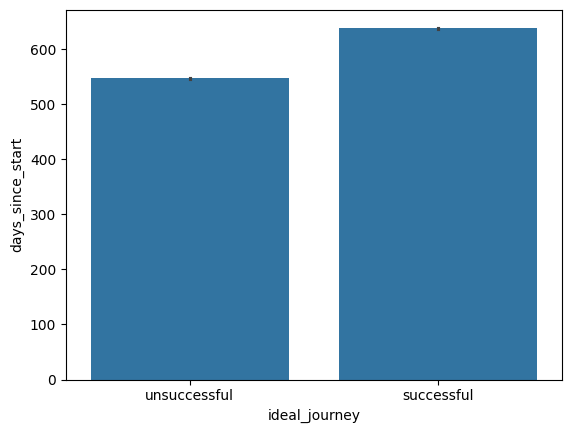

In [ ]:
sns.barplot(x = 'ideal_journey', y = 'days_since_start', data = df)

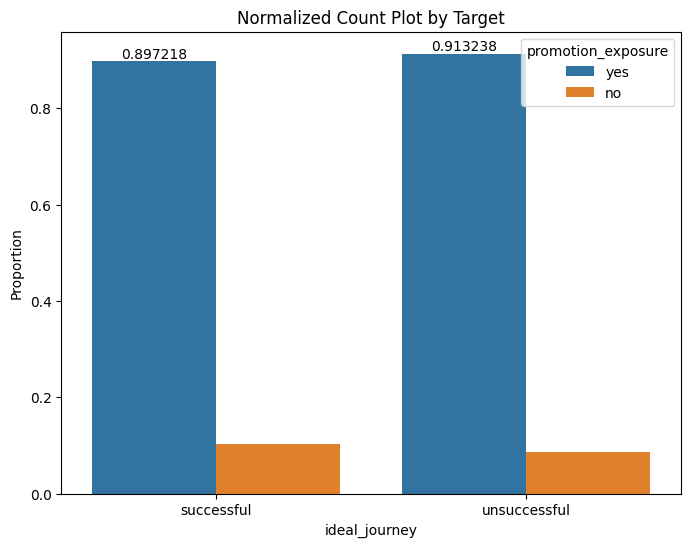

In [ ]:
proportions = df.groupby('ideal_journey')['promotion_exposure'].value_counts(normalize=True).rename('proportion').reset_index()
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='ideal_journey', y='proportion', hue='promotion_exposure', data=proportions, errorbar = None)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Normalized Count Plot by Target')
plt.ylabel('Proportion')
plt.show()


In [ ]:
df

,,first_event,days_since_start,first_stage,first_event_month,first_event_day,first_event_hour,ideal_journey,promotion_exposure
customer_id,account_id,,,,,,,,
-2147483541,2059949086,12,715,Apply for Credit,10,5,8,unsuccessful,yes
-2147481037,-1245770865,12,25,Apply for Credit,8,26,12,unsuccessful,yes
-2147474335,-1929965268,2,159,Discover,4,14,1,successful,yes
-2147474305,1098145658,6,660,First Purchase,11,28,22,unsuccessful,yes
-2147472167,889210381,12,213,Apply for Credit,2,19,8,successful,yes
...,...,...,...,...,...,...,...,...,...
2147480051,-148210516,21,1006,Prospecting,12,18,0,unsuccessful,yes
2147480182,-1286764612,12,90,Apply for Credit,6,22,9,unsuccessful,yes
2147480920,496493954,2,487,Discover,5,21,6,unsuccessful,yes


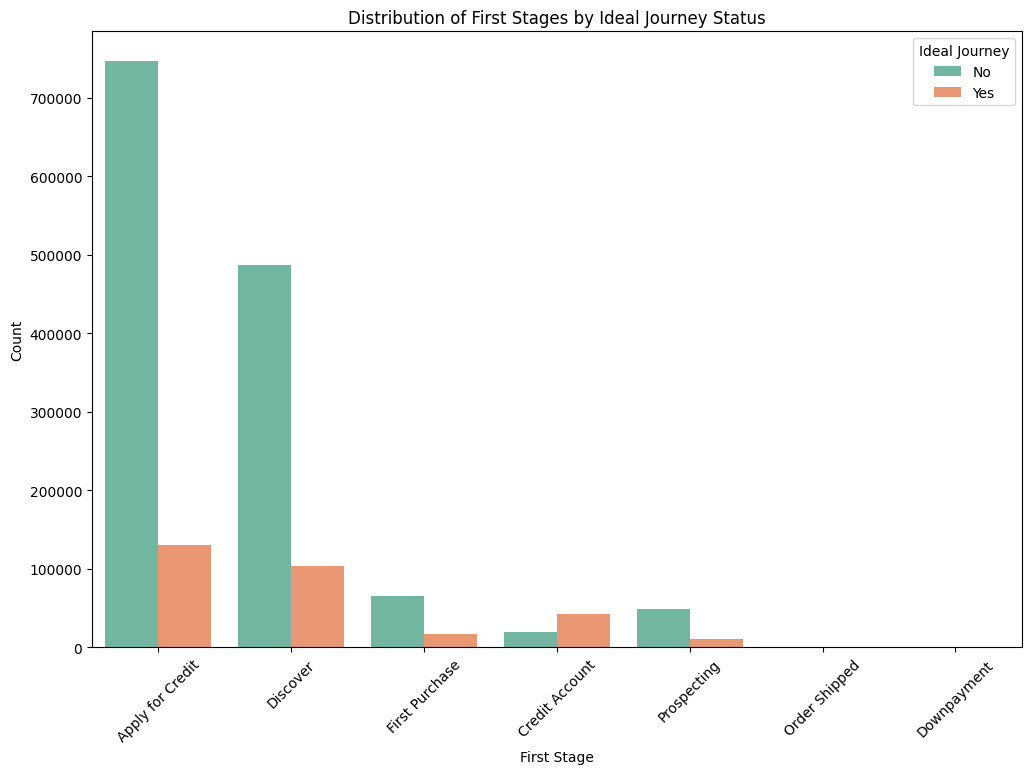

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='first_stage', hue='ideal_journey', data=df, palette='Set2')
plt.title('Distribution of First Stages by Ideal Journey Status')
plt.xlabel('First Stage')
plt.ylabel('Count')
plt.legend(title='Ideal Journey', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()

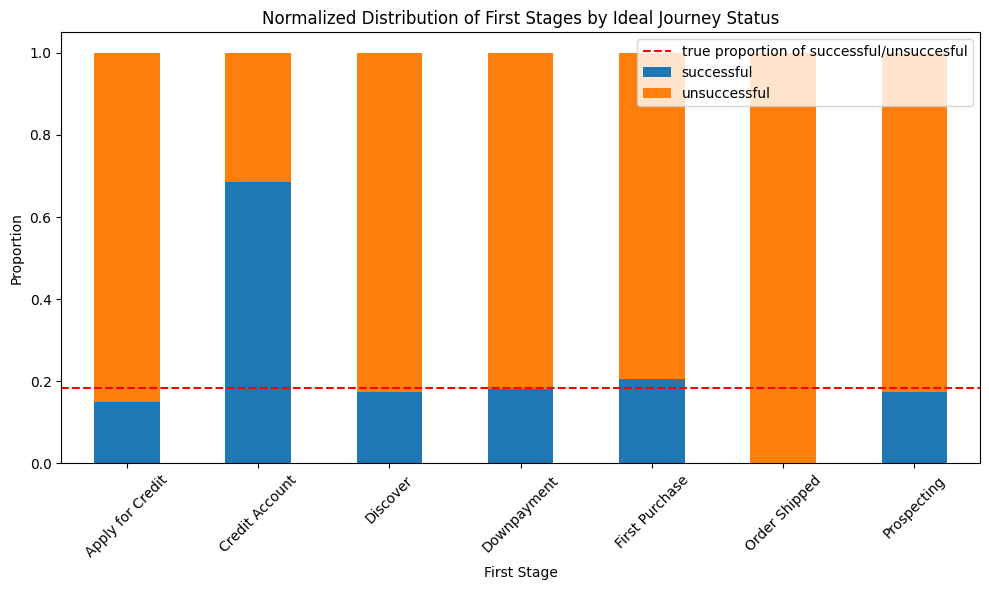

In [ ]:
proportions = df.groupby(['first_stage', 'ideal_journey']).size().unstack(fill_value=0)
proportions_normalized = proportions.div(proportions.sum(axis=1), axis=0)
proportions_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Normalized Distribution of First Stages by Ideal Journey Status')
plt.xlabel('First Stage')
plt.ylabel('Proportion')
plt.axhline(y=0.183241, color='red', linestyle='--', label = 'true prop of successful/unsuccesful')
plt.legend(loc='upper right')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [ ]:
df_ideal = df[df['ideal_journey'] == 'successful']
df_nonideal = df[df['ideal_journey'] == 'unsuccessful']

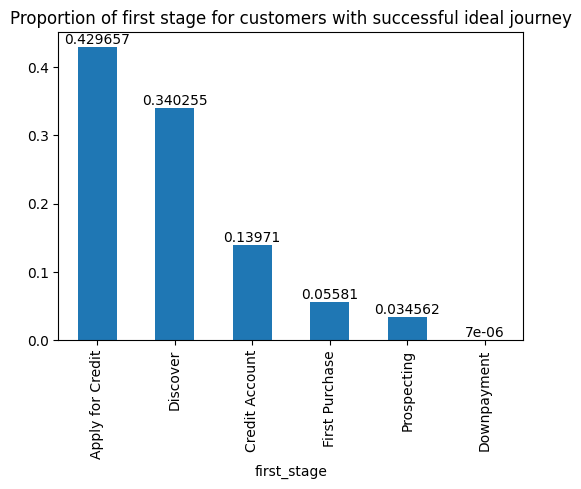

In [ ]:
plt.figure(figsize = (6, 4))
df_ideal['first_stage'].value_counts(normalize=True).plot(kind='bar')
for i, v in enumerate(df_ideal['first_stage'].value_counts(normalize=True)):
    plt.text(i, v, str(round(v, 6)), ha='center', va='bottom')
plt.title("Proportion of first stage for customers with successful ideal journey")
plt.show()

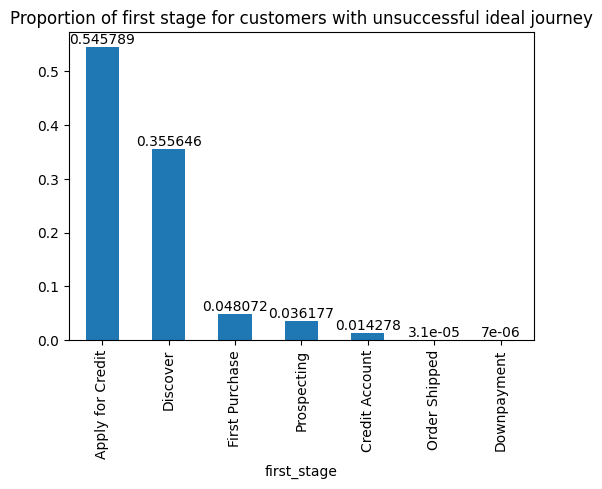

In [ ]:
plt.figure(figsize = (6, 4))
df_nonideal['first_stage'].value_counts(normalize=True).plot(kind='bar')

for i, v in enumerate(df_nonideal['first_stage'].value_counts(normalize=True)):
    plt.text(i, v, str(round(v, 6)), ha='center', va='bottom')
plt.title("Proportion of first stage for customers with unsuccessful ideal journey")
plt.show()

## Now inspect wide format data

In [ ]:
wide_df = pd.read_pickle("/Users/alyssaliu/Desktop/StatsM148/cleaned_wide_format_data.pkl")

In [ ]:
wide_df.set_index(['customer_id', 'account_id'], inplace=True)

In [ ]:
wide_df

,,ed_id,event_name,event_timestamp,journey_steps_until_end,stage,account_activation,place_order
customer_id,account_id,,,,,,,
-2147483541,2059949086,"[12, 5, 4, 11, 5, 6, 1, 4, 11, 4, 11, 5, 6, 5,...","[application_web_approved, view_cart, browse_p...","[2021-10-05 08:11:26+00:00, 2021-10-05 08:17:1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Apply for Credit, First Purchase, First Purch...",0,0
-2147481037,-1245770865,"[12, 1, 2, 5, 11, 4, 6]","[application_web_approved, promotion_created, ...","[2023-08-26 12:08:34+00:00, 2023-08-26 17:18:4...","[1, 2, 3, 4, 5, 6, 7]","[Apply for Credit, Promotion Created, Discover...",0,0
-2147474335,-1929965268,"[2, 12, 19, 3, 4, 4, 19, 4, 1, 11, 4, 5, 11, 4...","[campaign_click, application_web_approved, app...","[2023-04-14 01:42:50+00:00, 2023-04-14 19:42:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Discover, Apply for Credit, Apply for Credit,...",1,1
-2147474305,1098145658,"[6, 19, 19, 19, 19, 19, 19, 19, 1, 4, 19, 19, ...","[begin_checkout, application_web_view, applica...","[2021-11-28 22:27:11+00:00, 2021-11-28 22:28:0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[First Purchase, Apply for Credit, Apply for C...",0,0
-2147472167,889210381,"[12, 19, 3, 4, 4, 1, 1, 11, 5, 4, 11, 5, 4, 6,...","[application_web_approved, application_web_vie...","[2023-02-19 08:23:54+00:00, 2023-02-19 14:21:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Apply for Credit, Apply for Credit, Apply for...",1,1
...,...,...,...,...,...,...,...,...
2147480051,-148210516,"[21, 22, 2, 12, 24, 1, 21, 1, 1, 21, 1, 1, 1, 1]","[catalog_(mail), pre-application_(3rd_party_af...","[2020-12-18 00:00:00+00:00, 2021-01-23 06:00:0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","[Prospecting, Discover, Discover, Apply for Cr...",0,0
2147480182,-1286764612,"[12, 2, 24, 4, 24, 24, 24, 24, 24]","[application_web_approved, campaign_click, cam...","[2023-06-22 09:44:49+00:00, 2023-06-22 15:44:4...","[1, 2, 3, 4, 5, 6, 7, 8, 9]","[Apply for Credit, Discover, Campaignemail Cli...",0,0
2147480920,496493954,"[2, 19, 19, 19, 19, 19, 19, 19, 3, 19, 12, 4, ...","[campaign_click, application_web_view, applica...","[2022-05-21 06:00:00+00:00, 2022-05-21 23:30:3...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Discover, Apply for Credit, Apply for Credit,...",0,0


In [ ]:
# wide_df['ideal_journey'] = df['ideal_journey']
wide_df['ideal_journey'] = wide_df.index.map(df['ideal_journey'])

In [ ]:
wide_df['event_count'] = wide_df['event_name'].apply(len)
wide_df['unique_event_count'] = wide_df['event_name'].apply(lambda x: len(set(x)))
wide_df['unique_stage_count'] = wide_df['stage'].apply(lambda x: len(set(x)))
wide_df['last_event'] = wide_df['event_name'].apply(lambda x: x[-1] if x else None)
wide_df['last_stage'] = wide_df['stage'].apply(lambda x: x[-1] if x else None)
wide_df['len_journey'] = wide_df['journey_steps_until_end'].apply(len)
wide_df['days_in_journey'] = wide_df['event_timestamp'].apply(lambda x: (x[-1] - x[0]).days)
wide_df['progression_rate'] = wide_df['len_journey'] / wide_df['days_in_journey'] # estimate for progression rate of journey

In [ ]:
wide_df.head()

,,ed_id,event_name,event_timestamp,journey_steps_until_end,stage,account_activation,place_order,ideal_journey,event_count,unique_event_count,unique_stage_count,last_event,last_stage,len_journey,days_in_journey,progression_rate
customer_id,account_id,,,,,,,,,,,,,,,,
-2147483541,2059949086,"[12, 5, 4, 11, 5, 6, 1, 4, 11, 4, 11, 5, 6, 5,...","[application_web_approved, view_cart, browse_p...","[2021-10-05 08:11:26+00:00, 2021-10-05 08:17:1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Apply for Credit, First Purchase, First Purch...",0,0,unsuccessful,29,7,4,promotion_created,Promotion Created,29,238,0.121849
-2147481037,-1245770865,"[12, 1, 2, 5, 11, 4, 6]","[application_web_approved, promotion_created, ...","[2023-08-26 12:08:34+00:00, 2023-08-26 17:18:4...","[1, 2, 3, 4, 5, 6, 7]","[Apply for Credit, Promotion Created, Discover...",0,0,unsuccessful,7,7,4,begin_checkout,First Purchase,7,0,inf
-2147474335,-1929965268,"[2, 12, 19, 3, 4, 4, 19, 4, 1, 11, 4, 5, 11, 4...","[campaign_click, application_web_approved, app...","[2023-04-14 01:42:50+00:00, 2023-04-14 19:42:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Discover, Apply for Credit, Apply for Credit,...",1,1,successful,25,14,7,order_shipped,Order Shipped,25,17,1.470588
-2147474305,1098145658,"[6, 19, 19, 19, 19, 19, 19, 19, 1, 4, 19, 19, ...","[begin_checkout, application_web_view, applica...","[2021-11-28 22:27:11+00:00, 2021-11-28 22:28:0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[First Purchase, Apply for Credit, Apply for C...",0,0,unsuccessful,32,8,4,catalog_(mail),Prospecting,32,196,0.163265
-2147472167,889210381,"[12, 19, 3, 4, 4, 1, 1, 11, 5, 4, 11, 5, 4, 6,...","[application_web_approved, application_web_vie...","[2023-02-19 08:23:54+00:00, 2023-02-19 14:21:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Apply for Credit, Apply for Credit, Apply for...",1,1,successful,39,13,6,order_shipped,Order Shipped,39,19,2.052632


In [ ]:
wide_df['first_purchase'] = wide_df['stage'].apply(lambda x: 1 if 'First Purchase' in x else 0)

In [ ]:
event_id_dict = dict(zip(def_df['event_definition_id'], def_df['event_name']))


In [ ]:
event_dict = def_df.set_index('event_definition_id')['stage'].to_dict()

# add additional key value pair
event_dict[1] = 'Promotion Created'
event_dict[24] = 'Campaignemail Clicked'

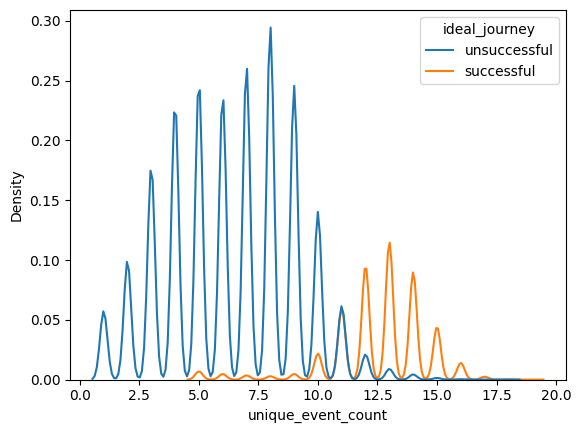

In [ ]:
sns.kdeplot(data=wide_df, x='unique_event_count', hue='ideal_journey')
plt.show()

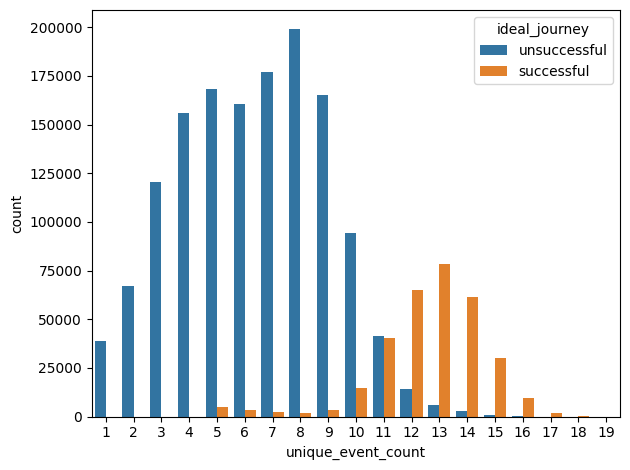

In [ ]:
sns.countplot(data=wide_df, x='unique_event_count', hue='ideal_journey')
plt.tight_layout()  
plt.show()

In [ ]:
ideal_df = wide_df[wide_df['ideal_journey'] == 'successful']
nonideal_df = wide_df[wide_df['ideal_journey'] == 'unsuccessful']

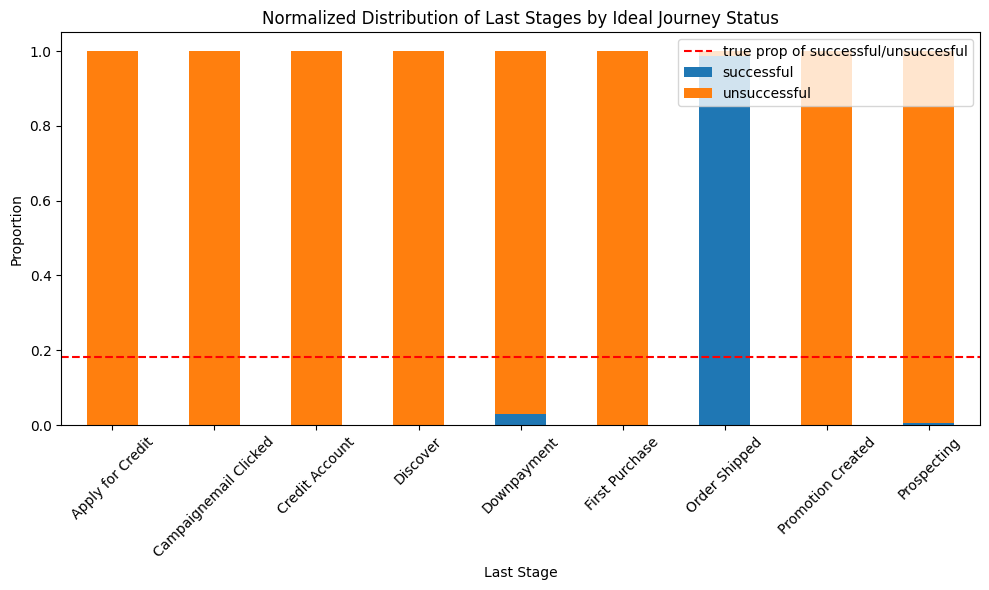

In [ ]:
proportions = wide_df.groupby(['last_stage', 'ideal_journey']).size().unstack(fill_value=0)
proportions_normalized = proportions.div(proportions.sum(axis=1), axis=0)
proportions_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Normalized Distribution of Last Stages by Ideal Journey Status')
plt.xlabel('Last Stage')
plt.ylabel('Proportion')
plt.axhline(y=0.183241, color='red', linestyle='--', label = 'true prop of successful/unsuccesful')
plt.legend(loc='upper right')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

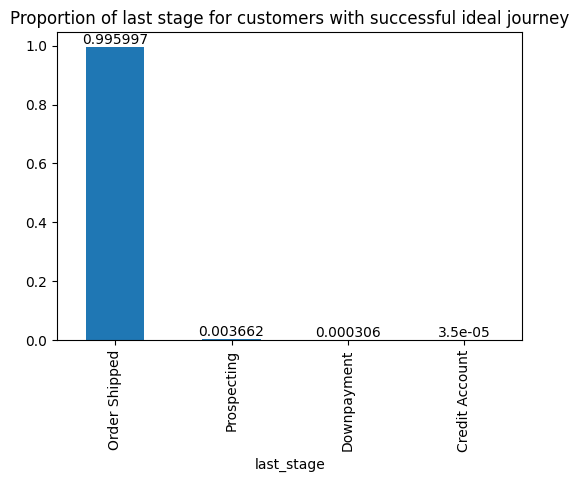

In [ ]:
plt.figure(figsize = (6, 4))
ideal_df['last_stage'].value_counts(normalize=True).plot(kind='bar')
for i, v in enumerate(ideal_df['last_stage'].value_counts(normalize=True)):
    plt.text(i, v, str(round(v, 6)), ha='center', va='bottom')
plt.title("Proportion of last stage for customers with successful ideal journey")
plt.show()

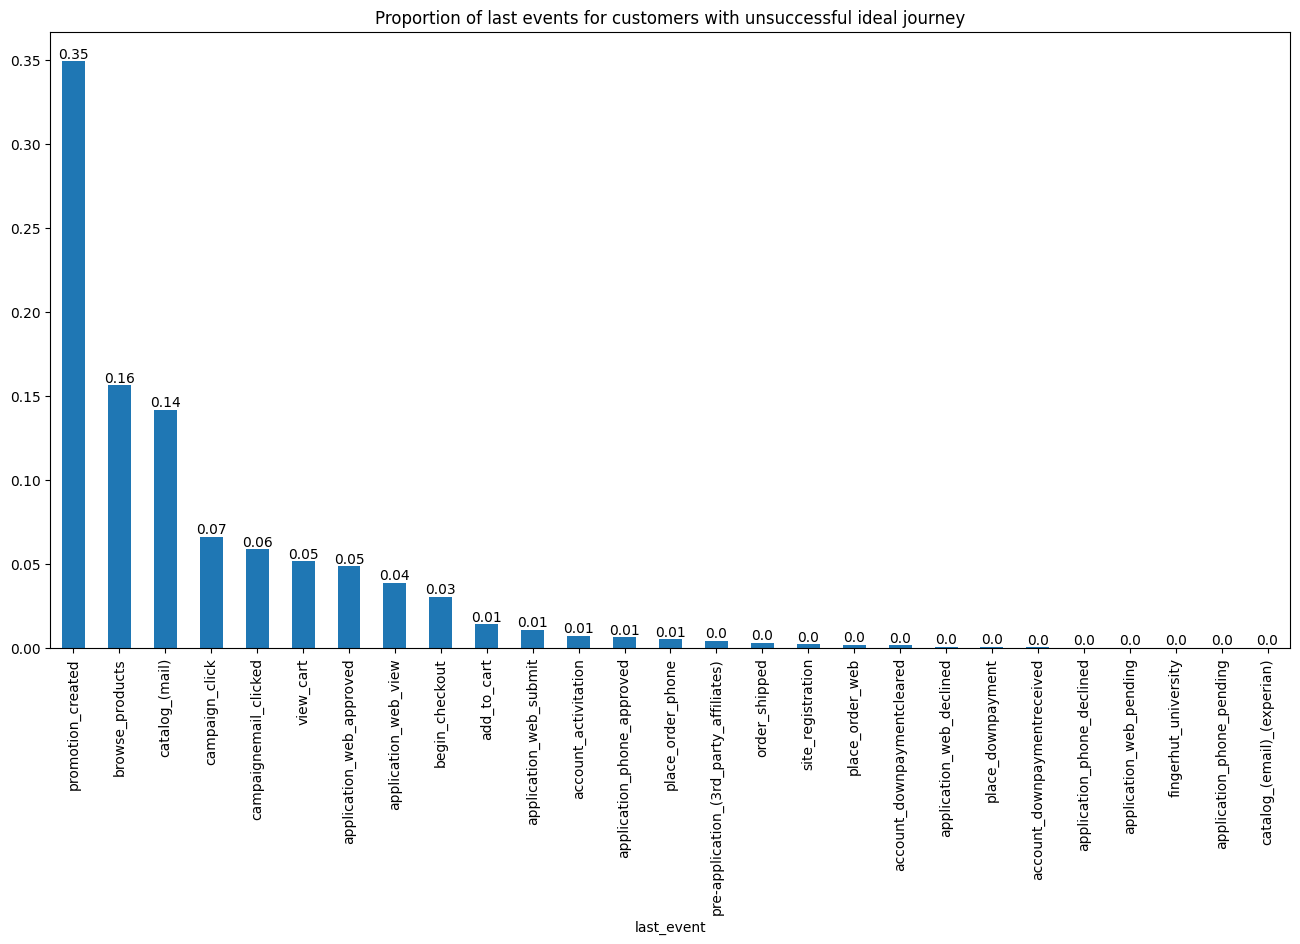

In [ ]:
plt.figure(figsize = (16, 8))
nonideal_df['last_event'].value_counts(normalize=True).plot(kind='bar')
for i, v in enumerate(nonideal_df['last_event'].value_counts(normalize=True)):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')
plt.title("Proportion of last events for customers with unsuccessful ideal journey")
plt.show()

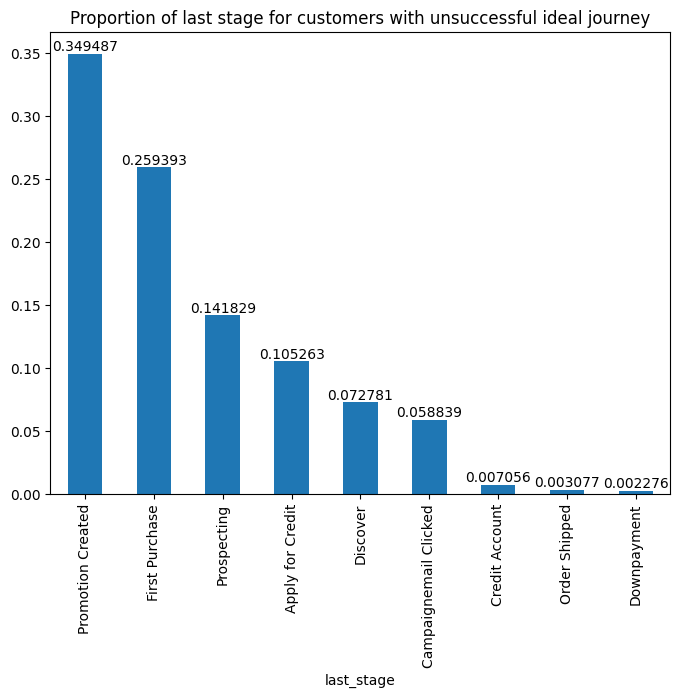

In [ ]:
plt.figure(figsize = (8, 6))
nonideal_df['last_stage'].value_counts(normalize=True).plot(kind='bar')
for i, v in enumerate(nonideal_df['last_stage'].value_counts(normalize=True)):
    plt.text(i, v, str(round(v, 6)), ha='center', va='bottom')
plt.title("Proportion of last stage for customers with unsuccessful ideal journey")
plt.show()

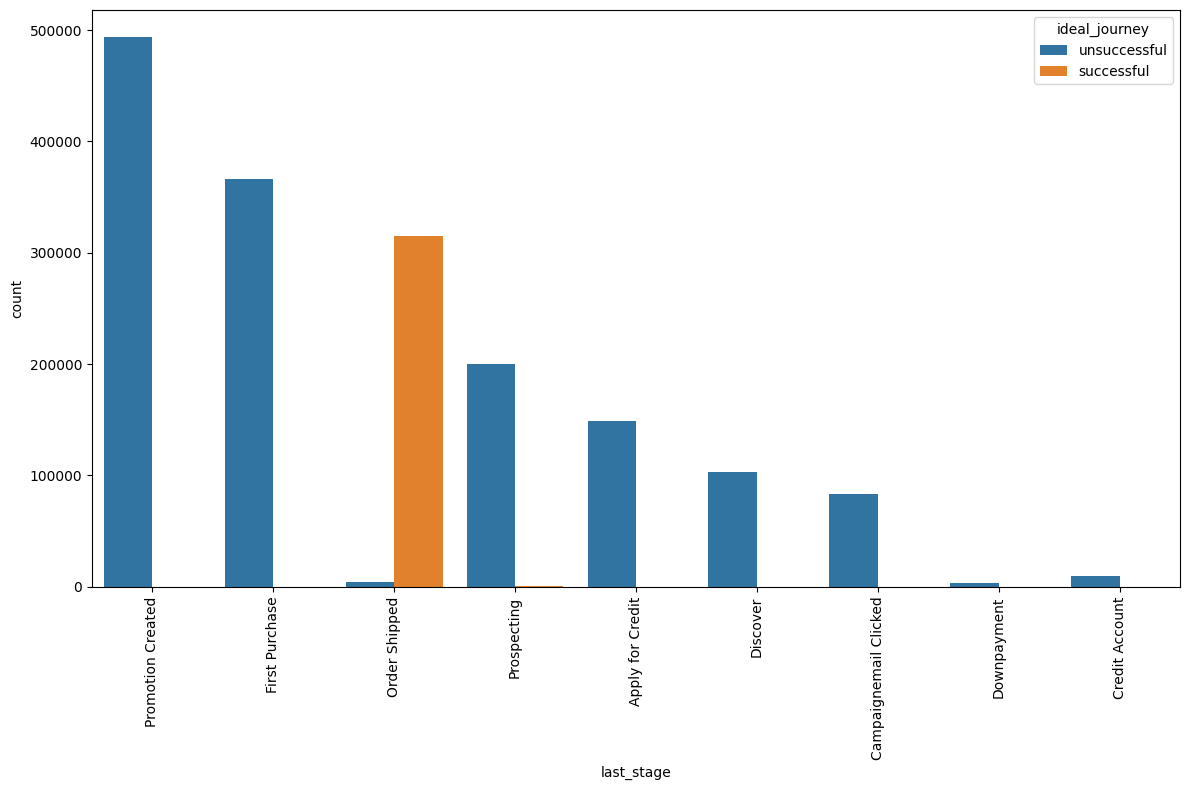

In [ ]:
plt.figure(figsize = (12, 8))
sns.countplot(data=wide_df, x='last_stage', hue='ideal_journey')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

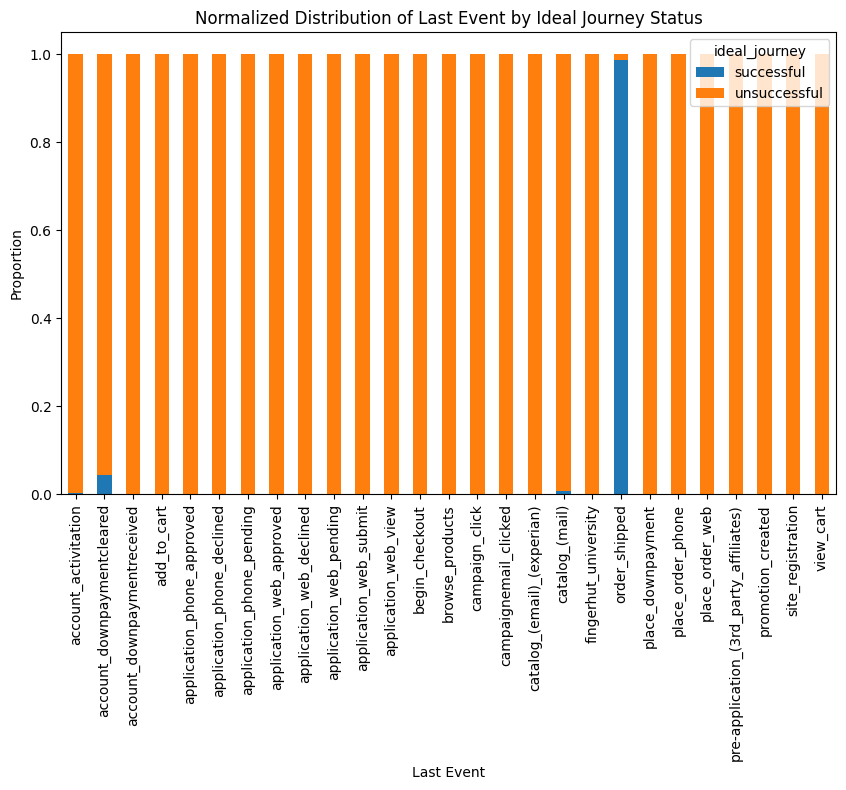

In [ ]:
proportions = wide_df.groupby(['last_event', 'ideal_journey']).size().unstack(fill_value=0)
proportions_normalized = proportions.div(proportions.sum(axis=1), axis=0)
proportions_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Normalized Distribution of Last Event by Ideal Journey Status')
plt.xlabel('Last Event')
plt.ylabel('Proportion')
plt.xticks(rotation=90) 
plt.show()

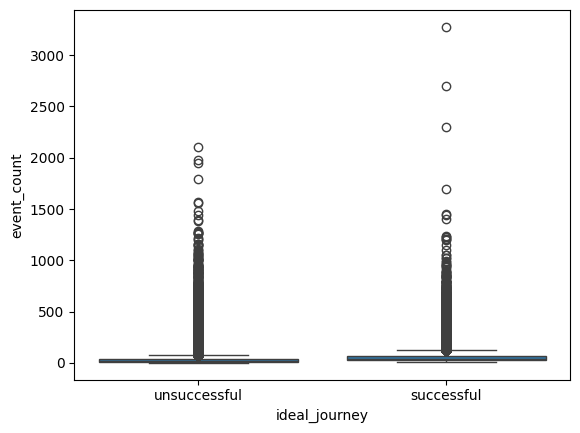

In [ ]:
sns.boxplot(data=wide_df, x='ideal_journey', y='event_count')
plt.show()

In [ ]:
from itertools import chain

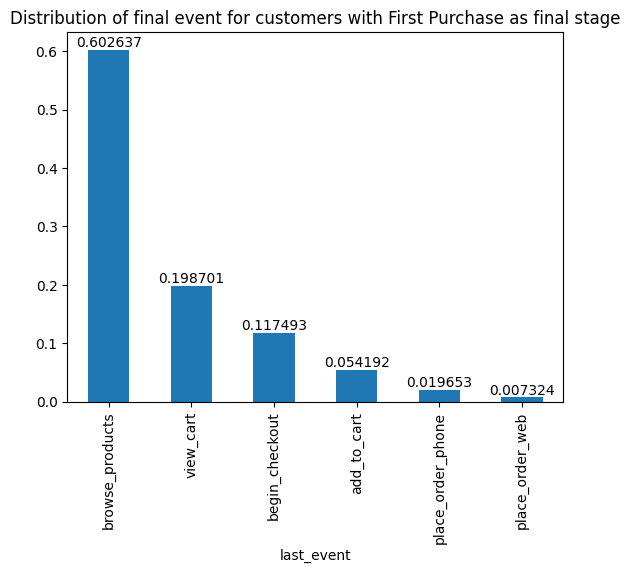

In [ ]:
last_stage_purchase = wide_df[wide_df['last_stage'] == 'First Purchase']
last_stage_purchase['last_event'].value_counts(normalize = True).plot(kind = 'bar')
for i, v in enumerate(last_stage_purchase['last_event'].value_counts(normalize=True)):
    plt.text(i, v, str(round(v, 6)), ha='center', va='bottom')
plt.title("Distribution of final event for customers with First Purchase as final stage")
plt.show()

In [ ]:
first_purchase_df = wide_df[widf['stage'].apply(lambda stages: 'First Purchase' in stages)]
event_names = list(chain.from_iterable(wide_df['event_name']))
event_name_counts = pd.Series(event_names).value_counts()
plt.figure(figsize=(10, 8))
sns.barplot(x=event_name_counts.values, y=event_name_counts.index)
plt.xlabel('Counts')
plt.ylabel('Event Names')
plt.title('Counts of Event Names Corresponding to "First Purchase" Stage')
plt.show()

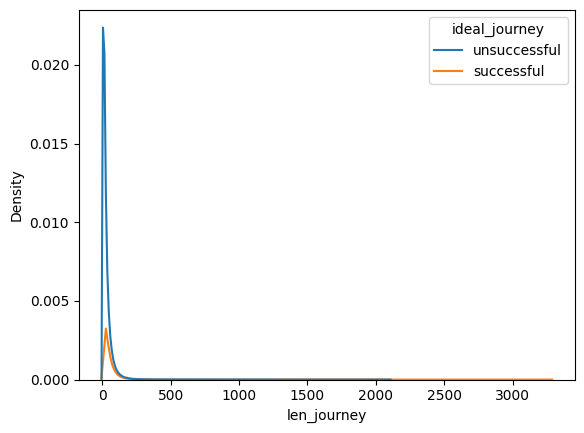

In [ ]:
sns.kdeplot(data=wide_df, x='len_journey', hue='ideal_journey')
plt.show()

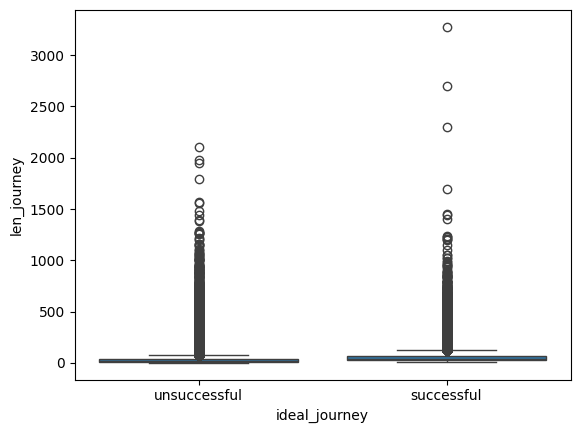

In [ ]:
sns.boxplot(data=wide_df, x='ideal_journey', y='len_journey')
plt.show()

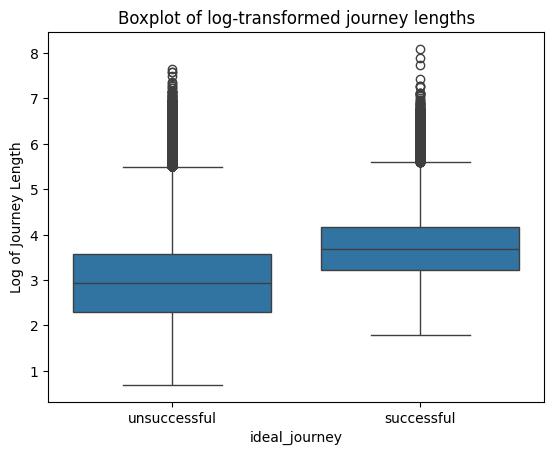

In [ ]:
wide_df['log_len_journey'] = np.log(wide_df['len_journey'] + 1) # log-transformed data
sns.boxplot(data=wide_df, x='ideal_journey', y='log_len_journey')
plt.title('Boxplot of log-transformed journey lengths')
plt.ylabel('Log of Journey Length')
plt.show()

# More Classification Models

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_pickle(("/Users/alyssaliu/Desktop/StatsM148/updated_feature_engineered_data.pkl"))

In [ ]:
sampled_df = pd.read_pickle("/Users/alyssaliu/Desktop/StatsM148/updated_clustering_sample_df.pkl")

In [ ]:
df

,customer_id,account_id,first_event,days_since_start,first_stage,first_event_month,first_event_day,first_event_hour,ideal_journey,promotion_exposure
0,-2147483541,2059949086,12,715,1,10,5,8,0,1
1,-2147481037,-1245770865,12,25,1,8,26,12,0,1
2,-2147474335,-1929965268,2,159,3,4,14,1,1,1
3,-2147474305,1098145658,6,660,5,11,28,22,0,1
4,-2147472167,889210381,12,213,1,2,19,8,1,1
...,...,...,...,...,...,...,...,...,...,...
1728480,2147480051,-148210516,21,1006,7,12,18,0,0,1
1728481,2147480182,-1286764612,12,90,1,6,22,9,0,1
1728482,2147480920,496493954,2,487,3,5,21,6,0,1
1728483,2147482120,-488077144,12,51,1,7,30,15,0,1


In [ ]:
model_df = df.drop(['customer_id', 'account_id'], axis = 1)
X = model_df.drop(['ideal_journey'], axis = 1)
y = model_df['ideal_journey'] # we use ideal_journey rather than order_shipped etc because the two variables have a correlation of 0.99

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [ ]:
y_train.value_counts()

ideal_journey
0    946061
1    212023
Name: count, dtype: int64

In [ ]:
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1] # scale weights of imbalanced data 
xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc}")

              precision    recall  f1-score   support

           0       0.87      0.65      0.74    465695
           1       0.27      0.57      0.36    104706

    accuracy                           0.64    570401
   macro avg       0.57      0.61      0.55    570401
weighted avg       0.76      0.64      0.67    570401

ROC AUC Score: 0.6677974466833927


In [ ]:
scale_pos_weight

4.462067794531725

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [ ]:
# Define a parameter grid to search
param_dist = {'n_estimators': randint(100, 500),'learning_rate': uniform(0.01, 0.3),'subsample': uniform(0.7, 0.3),'max_depth': randint(3, 10),
              'colsample_bytree': uniform(0.7, 0.3),'min_child_weight': randint(1, 6)}
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, 
                                   scoring='roc_auc', error_score=0, verbose=3, n_jobs=-1, cv=3)
random_search.fit(X_train, y_train)
print(f"Best parameters found: {random_search.best_params_}")
print(f"Best ROC AUC found: {random_search.best_score_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END colsample_bytree=0.7084991855763053, learning_rate=0.1597002065318124, max_depth=7, min_child_weight=5, n_estimators=108, subsample=0.8450666423031574;, score=0.665 total time=  20.4s
[CV 2/3] END colsample_bytree=0.7084991855763053, learning_rate=0.1597002065318124, max_depth=7, min_child_weight=5, n_estimators=108, subsample=0.8450666423031574;, score=0.666 total time=  20.4s
[CV 3/3] END colsample_bytree=0.7084991855763053, learning_rate=0.1597002065318124, max_depth=7, min_child_weight=5, n_estimators=108, subsample=0.8450666423031574;, score=0.666 total time=  20.6s
[CV 1/3] END colsample_bytree=0.9713443350599842, learning_rate=0.30212087420444406, max_depth=5, min_child_weight=2, n_estimators=168, subsample=0.819289977307222;, score=0.665 total time=  24.1s
[CV 2/3] END colsample_bytree=0.9713443350599842, learning_rate=0.30212087420444406, max_depth=5, min_child_weight=2, n_estimators=168, subsample=0.819

# Clustering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_pickle("/Users/alyssaliu/Desktop/StatsM148/updated_feature_engineered_data.pkl")
print(df.shape)
df.head()

(1728485, 10)


,customer_id,account_id,first_event,days_since_start,first_stage,first_event_month,first_event_day,first_event_hour,ideal_journey,promotion_exposure
0,-2147483541,2059949086,12,715,1,10,5,8,0,1
1,-2147481037,-1245770865,12,25,1,8,26,12,0,1
2,-2147474335,-1929965268,2,159,3,4,14,1,1,1
3,-2147474305,1098145658,6,660,5,11,28,22,0,1
4,-2147472167,889210381,12,213,1,2,19,8,1,1


In [ ]:
y = df['ideal_journey']
X = df.drop(['customer_id', 'account_id'], axis = 1)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

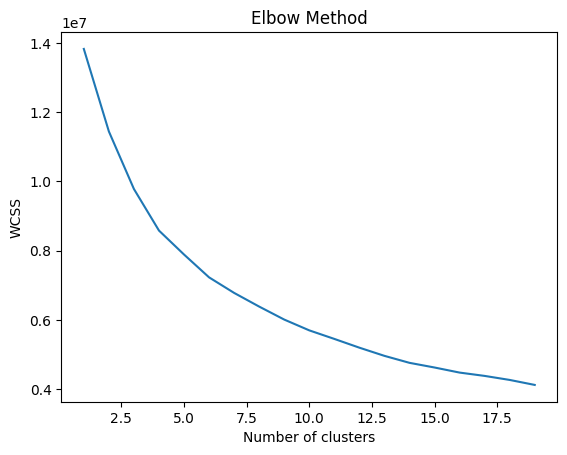

In [ ]:
wcss = []
for i in range(1, 20): 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0) # multiple initializations
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) 
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_scaled)
labels = kmeans.labels_
df['Cluster'] = labels

In [ ]:
df.head()

,customer_id,account_id,first_event,days_since_start,first_stage,first_event_month,first_event_day,first_event_hour,ideal_journey,promotion_exposure,Cluster
0,-2147483541,2059949086,12,715,1,10,5,8,0,1,4
1,-2147481037,-1245770865,12,25,1,8,26,12,0,1,4
2,-2147474335,-1929965268,2,159,3,4,14,1,1,1,3
3,-2147474305,1098145658,6,660,5,11,28,22,0,1,0
4,-2147472167,889210381,12,213,1,2,19,8,1,1,3


In [ ]:
import seaborn as sns

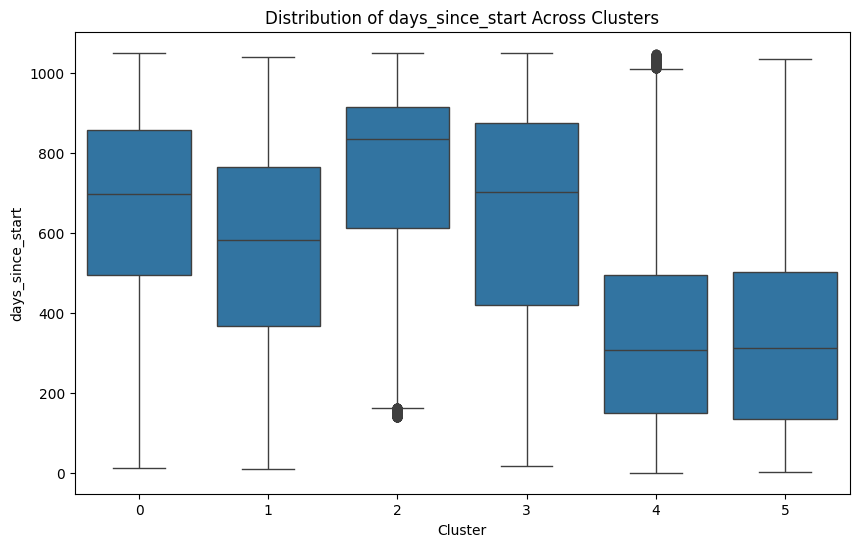

In [ ]:
feature_to_plot = 'first_event'
plt.figure(figsize=(10,6))
sns.boxplot(x='Cluster', y=feature_to_plot, data=df)
plt.title(f'Distribution of {feature_to_plot} Across Clusters')
plt.show()

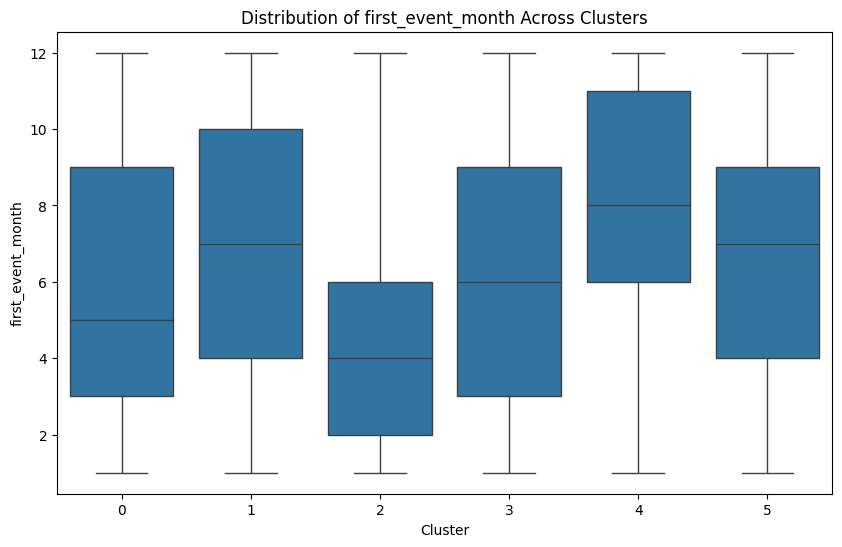

In [ ]:
feature_to_plot = 'first_event_month'
plt.figure(figsize=(10,6))
sns.boxplot(x='Cluster', y=feature_to_plot, data=df)
plt.title(f'Distribution of {feature_to_plot} Across Clusters')
plt.show()

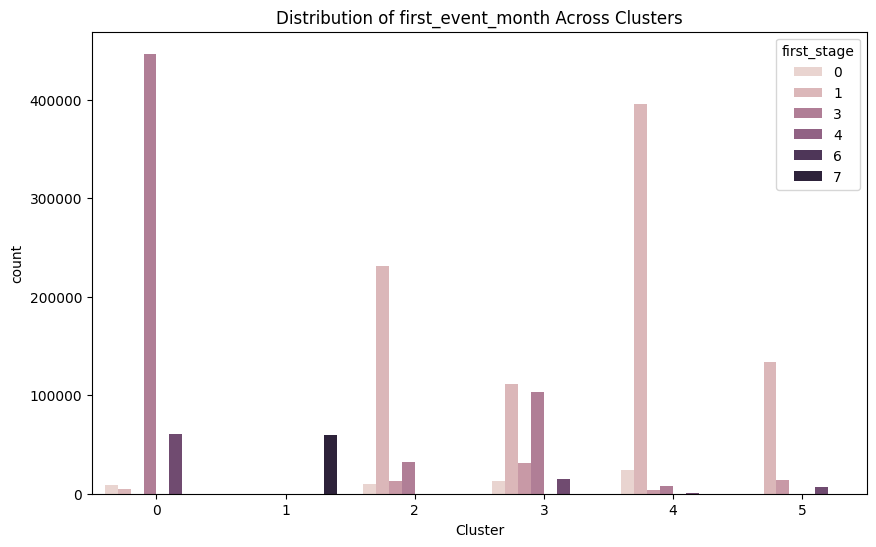

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(hue='first_stage', x='Cluster', data=df)
plt.title(f'Distribution of {feature_to_plot} Across Clusters')
plt.show()

In [ ]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=X_scaled.columns)
print(centers)

   first_event  days_since_start  first_stage  first_event_month  \
0    -1.058130          0.290799     0.717781          -0.084222   
1     1.371440          0.010758     3.260050           0.158246   
2     0.713150          0.711333    -0.563915          -0.635492   
3     0.068054          0.262415    -0.030905          -0.049073   
4     0.348618         -0.744691    -0.728220           0.472144   
5     0.607259         -0.695967    -0.546831           0.176581   

   first_event_day  first_event_hour  ideal_journey  promotion_exposure  
0         0.014012         -0.425597      -0.473657            0.313763  
1        -0.237013         -1.371954      -0.021511            0.311458  
2        -0.005119         -0.019973      -0.473657            0.313905  
3        -0.001171         -0.076837       2.111232            0.313112  
4         0.026405          0.557332      -0.473549            0.313905  
5        -0.017040          0.584474       0.068496           -3.185682  


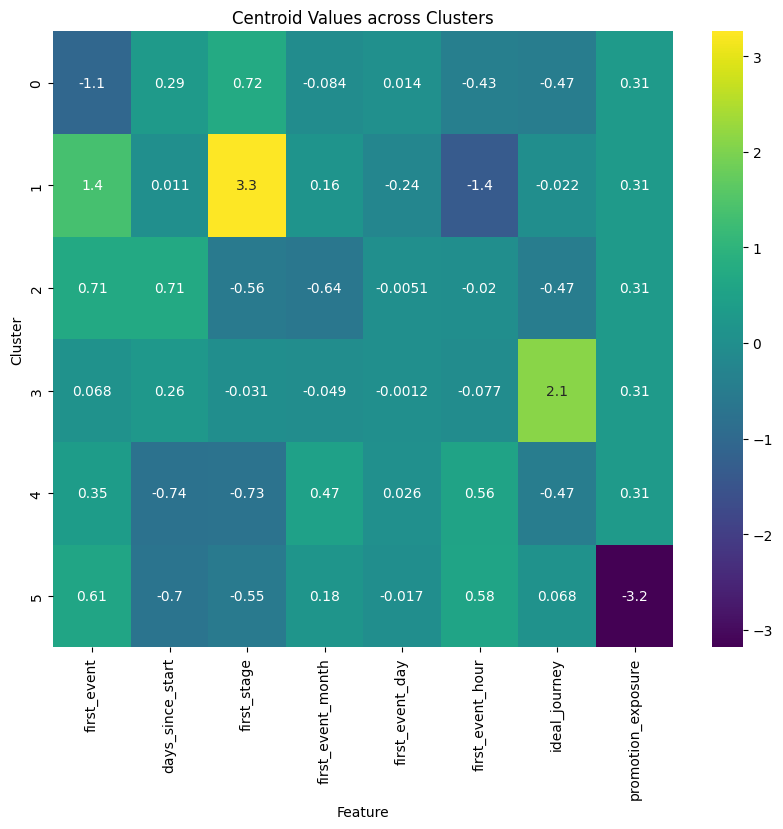

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(centers, annot=True, cmap='viridis')
plt.title('Centroid Values across Clusters')
plt.xlabel('Feature')
plt.ylabel('Cluster')
plt.show()

In [ ]:
df.head()

,customer_id,account_id,first_event,days_since_start,first_stage,first_event_month,first_event_day,first_event_hour,ideal_journey,promotion_exposure,Cluster
0,-2147483541,2059949086,12,715,1,10,5,8,0,1,4
1,-2147481037,-1245770865,12,25,1,8,26,12,0,1,4
2,-2147474335,-1929965268,2,159,3,4,14,1,1,1,3
3,-2147474305,1098145658,6,660,5,11,28,22,0,1,0
4,-2147472167,889210381,12,213,1,2,19,8,1,1,3


In [ ]:
cluster_0 = df[df['Cluster'] == 0]
cluster_0_cust = cluster_0['customer_id'].to_list()
print(cluster_0.shape)

(520615, 11)


In [ ]:
cluster_1 = df[df['Cluster'] == 1]
cluster_1_cust = cluster_1['customer_id'].to_list()
print(cluster_1.shape)

(60085, 11)


In [ ]:
cluster_2 = df[df['Cluster'] == 2]
cluster_2_cust = cluster_2['customer_id'].to_list()
print(cluster_2.shape)

(287676, 11)


In [ ]:
cluster_3 = df[df['Cluster'] == 3]
cluster_3_cust = cluster_3['customer_id'].to_list()
print(cluster_3.shape)

(273712, 11)


In [ ]:
cluster_4 = df[df['Cluster'] == 4]
cluster_4_cust = cluster_4['customer_id'].to_list()
print(cluster_4.shape)

(431481, 11)


In [ ]:
cluster_5 = df[df['Cluster'] == 5]
cluster_5_cust = cluster_5['customer_id'].to_list()
print(cluster_5.shape)

(154916, 11)


## Inspecting entire dataframe per cluster

In [ ]:
df_whole = pd.read_pickle("/Users/alyssaliu/Desktop/StatsM148/cleaned_wide_format_data.pkl")

In [ ]:
cluster_1_df = df_whole[df_whole['customer_id'].isin(cluster_1_cust)]
cluster_2_df = df_whole[df_whole['customer_id'].isin(cluster_2_cust)]
cluster_3_df = df_whole[df_whole['customer_id'].isin(cluster_3_cust)]
cluster_4_df = df_whole[df_whole['customer_id'].isin(cluster_4_cust)]
cluster_5_df = df_whole[df_whole['customer_id'].isin(cluster_5_cust)]

In [ ]:
cluster_0_df = df_whole[df_whole['customer_id'].isin(cluster_0_cust)]
cluster_0_df.to_pickle("/Users/alyssaliu/Desktop/StatsM148/cluster_0_df.pkl")

In [ ]:
## export cluster dataframes for easy access
cluster_1_df.to_pickle("/Users/alyssaliu/Desktop/StatsM148/cluster_1_df.pkl")
cluster_2_df.to_pickle("/Users/alyssaliu/Desktop/StatsM148/cluster_2_df.pkl")
cluster_3_df.to_pickle("/Users/alyssaliu/Desktop/StatsM148/cluster_3_df.pkl")
cluster_4_df.to_pickle("/Users/alyssaliu/Desktop/StatsM148/cluster_4_df.pkl")
cluster_5_df.to_pickle("/Users/alyssaliu/Desktop/StatsM148/cluster_5_df.pkl")

In [ ]:
cluster_1_df.head()

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end,stage,account_activation,place_order
81,-2147294441,104246387,"[21, 22, 2, 12, 1, 4, 4, 1, 21, 1, 1, 21, 1, 2...","[catalog_(mail), pre-application_(3rd_party_af...","[2021-09-20 00:00:00+00:00, 2021-11-16 06:00:0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Prospecting, Discover, Discover, Apply for Cr...",0,0
88,-2147279146,-1839022966,"[21, 2, 12, 1, 21, 1, 1, 21]","[catalog_(mail), campaign_click, application_w...","[2022-01-17 00:00:00+00:00, 2022-03-14 06:00:0...","[1, 2, 3, 4, 5, 6, 7, 8]","[Prospecting, Discover, Apply for Credit, Prom...",0,0
120,-2147224768,1482557947,"[21, 2, 12, 6, 7, 8, 4, 24, 24, 29, 27, 28]","[catalog_(mail), campaign_click, application_w...","[2021-02-15 00:00:00+00:00, 2021-03-04 06:00:0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[Prospecting, Discover, Apply for Credit, Firs...",1,1
170,-2147070521,-1216506929,"[21, 12, 5]","[catalog_(mail), application_web_approved, vie...","[2022-11-11 00:00:00+00:00, 2022-12-17 13:26:3...","[1, 2, 3]","[Prospecting, Apply for Credit, First Purchase]",0,0
174,-2147057611,-201771542,"[21, 19, 19, 19, 19, 19, 3, 12, 19, 4, 4, 11, ...","[catalog_(mail), application_web_view, applica...","[2021-03-15 00:00:00+00:00, 2021-05-10 12:58:3...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Prospecting, Apply for Credit, Apply for Cred...",0,0


In [ ]:
def create_flow_counts(df):
    source_target_pairs = []
    for path in df['stage']:
        pairs = [(path[i], path[i+1]) for i in range(len(path)-1)]
        source_target_pairs.extend(pairs)
    pairs_df = pd.DataFrame(source_target_pairs, columns=['source', 'target'])
    flow_counts = pairs_df.groupby(['source', 'target']).size().reset_index(name='value')
    all_nodes = list(set(flow_counts['source']).union(set(flow_counts['target'])))
    node_dict = {node: i for i, node in enumerate(all_nodes)}

    # Map to df
    flow_counts['source_id'] = flow_counts['source'].map(node_dict)
    flow_counts['target_id'] = flow_counts['target'].map(node_dict)
    
    return flow_counts


def create_flow_counts_events(df):
    source_target_pairs = []
    for path in df['event_name']:
        pairs = [(path[i], path[i+1]) for i in range(len(path)-1)]
        source_target_pairs.extend(pairs)
    pairs_df = pd.DataFrame(source_target_pairs, columns=['source', 'target'])
    flow_counts = pairs_df.groupby(['source', 'target']).size().reset_index(name='value')
    all_nodes = list(set(flow_counts['source']).union(set(flow_counts['target'])))
    node_dict = {node: i for i, node in enumerate(all_nodes)}

    # Map to df
    flow_counts['source_id'] = flow_counts['source'].map(node_dict)
    flow_counts['target_id'] = flow_counts['target'].map(node_dict)
    
    return flow_counts

In [ ]:
clust_1_flow_counts = create_flow_counts(cluster_1_df)
clust_2_flow_counts = create_flow_counts(cluster_2_df)
clust_3_flow_counts = create_flow_counts(cluster_3_df)
clust_4_flow_counts = create_flow_counts(cluster_4_df)
clust_5_flow_counts = create_flow_counts(cluster_5_df)

In [ ]:
clust_1_flow_counts

,source,target,value,source_id,target_id
0,Apply for Credit,Apply for Credit,125033,3,3
1,Apply for Credit,Campaignemail Clicked,2359,3,6
2,Apply for Credit,Credit Account,1028,3,0
3,Apply for Credit,Discover,3827,3,8
4,Apply for Credit,Downpayment,168,3,7
...,...,...,...,...,...
68,Prospecting,Downpayment,63,5,7
69,Prospecting,First Purchase,6500,5,2
70,Prospecting,Order Shipped,133,5,4
71,Prospecting,Promotion Created,50276,5,1


In [ ]:
clust_1_flow_counts[clust_1_flow_counts['source'] == clust_1_flow_counts['target']]

,source,target,value,source_id,target_id
0,Apply for Credit,Apply for Credit,125033,3,3
10,Campaignemail Clicked,Campaignemail Clicked,12161,6,6
29,Discover,Discover,5619,8,8
39,Downpayment,Downpayment,3731,7,7
49,First Purchase,First Purchase,724566,2,2
62,Promotion Created,Promotion Created,95442,1,1
72,Prospecting,Prospecting,7815,5,5


## Flow Counts for entire dataframe

In [ ]:
flow_counts = create_flow_counts(df_whole)

In [ ]:
flow_counts

,source,target,value,source_id,target_id
0,Apply for Credit,Apply for Credit,7041805,3,3
1,Apply for Credit,Campaignemail Clicked,79595,3,6
2,Apply for Credit,Credit Account,19365,3,0
3,Apply for Credit,Discover,178295,3,8
4,Apply for Credit,Downpayment,5823,3,7
...,...,...,...,...,...
69,Prospecting,Downpayment,2232,5,7
70,Prospecting,First Purchase,239394,5,2
71,Prospecting,Order Shipped,4252,5,4
72,Prospecting,Promotion Created,1360044,5,1


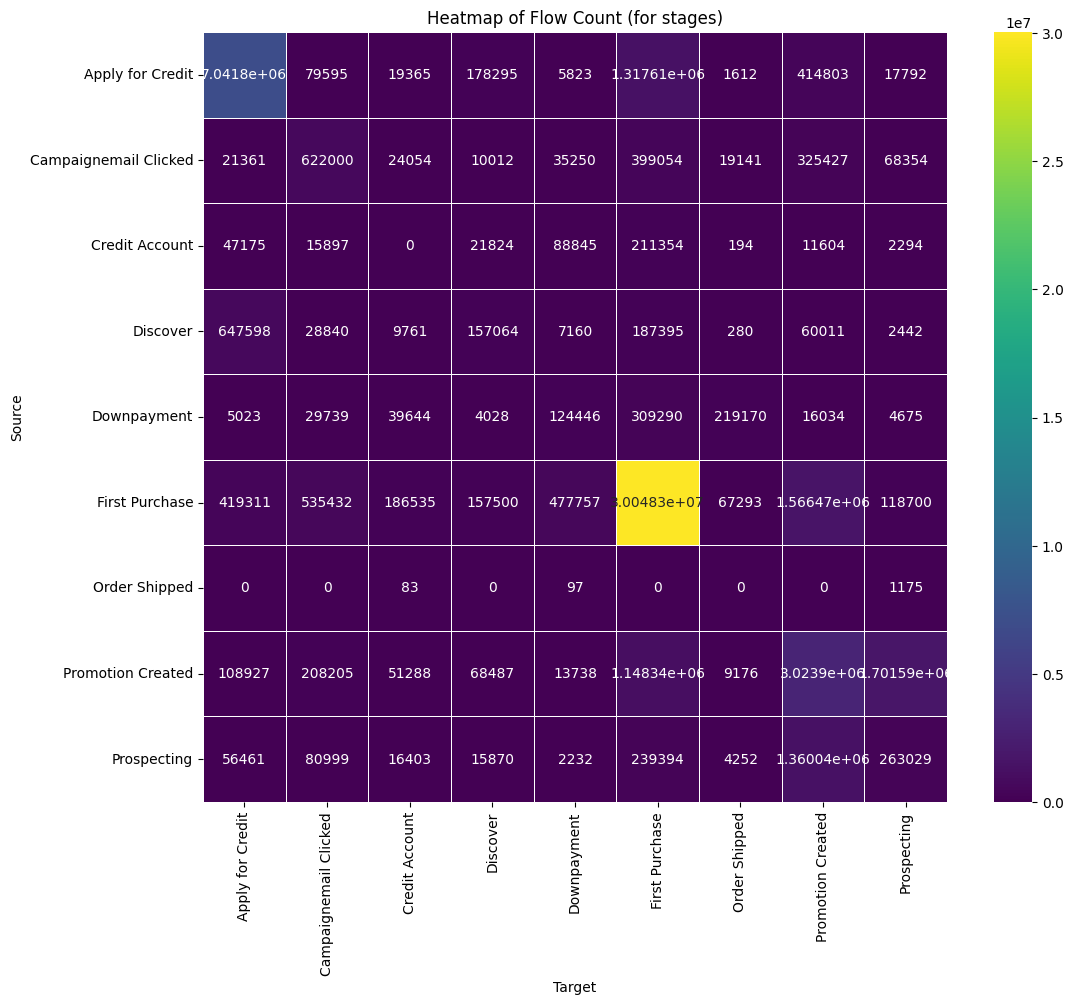

In [ ]:
stage_flow_df = flow_counts.pivot_table(index='source', columns='target', values='value', aggfunc='sum')
stage_flow_df = stage_flow_df.fillna(0)
plt.figure(figsize=(12, 10)) 
sns.heatmap(stage_flow_df, annot=True, cmap='viridis', fmt='g', linewidths=.5)
plt.title('Heatmap of Flow Count (for stages)')
plt.ylabel('Source')
plt.xlabel('Target')
plt.show()

In [ ]:
flow_counts[flow_counts['source'] == flow_counts['target']]

,source,target,value,source_id,target_id
0,Apply for Credit,Apply for Credit,7041805,3,3
10,Campaignemail Clicked,Campaignemail Clicked,622000,6,6
29,Discover,Discover,157064,8,8
39,Downpayment,Downpayment,124446,7,7
49,First Purchase,First Purchase,30048259,2,2
63,Promotion Created,Promotion Created,3023899,1,1
73,Prospecting,Prospecting,263029,5,5


### Take a closer look at event flows where stage is First Purchase

In [ ]:
event_flow_counts = create_flow_counts_events(df_whole)
event_flow_counts

,source,target,value,source_id,target_id
0,account_activitation,account_downpaymentcleared,77770,18,6
1,account_activitation,account_downpaymentreceived,1786,18,19
2,account_activitation,add_to_cart,4366,18,15
3,account_activitation,application_phone_approved,3349,18,24
4,account_activitation,application_phone_declined,24,18,2
...,...,...,...,...,...
544,view_cart,place_order_web,8308,0,20
545,view_cart,pre-application_(3rd_party_affiliates),677,0,22
546,view_cart,promotion_created,302074,0,4
547,view_cart,site_registration,5225,0,16


In [ ]:
def_df = pd.read_csv("/Users/alyssaliu/Desktop/StatsM148/Event Definitions.csv")
first_purchase = list(def_df[def_df['stage'] == 'First Purchase']['event_name'].values)

In [ ]:
first_purchase_flow_df = event_flow_counts[(event_flow_counts['source'].isin(first_purchase)) & (event_flow_counts['target'].isin(first_purchase))]
# first_purchase_flow_df = first_purchase_flow_df[first_purchase_flow_df['source'] != first_purchase_flow_df['target']]
first_purchase_flow_df

,source,target,value,source_id,target_id
61,add_to_cart,add_to_cart,73384,15,15
69,add_to_cart,begin_checkout,96941,15,7
70,add_to_cart,browse_products,1850246,15,10
77,add_to_cart,place_order_phone,383,15,12
78,add_to_cart,place_order_web,5355,15,20
82,add_to_cart,view_cart,1795520,15,0
231,begin_checkout,add_to_cart,47627,7,15
239,begin_checkout,begin_checkout,232073,7,7
240,begin_checkout,browse_products,249841,7,10
247,begin_checkout,place_order_phone,1942,7,12


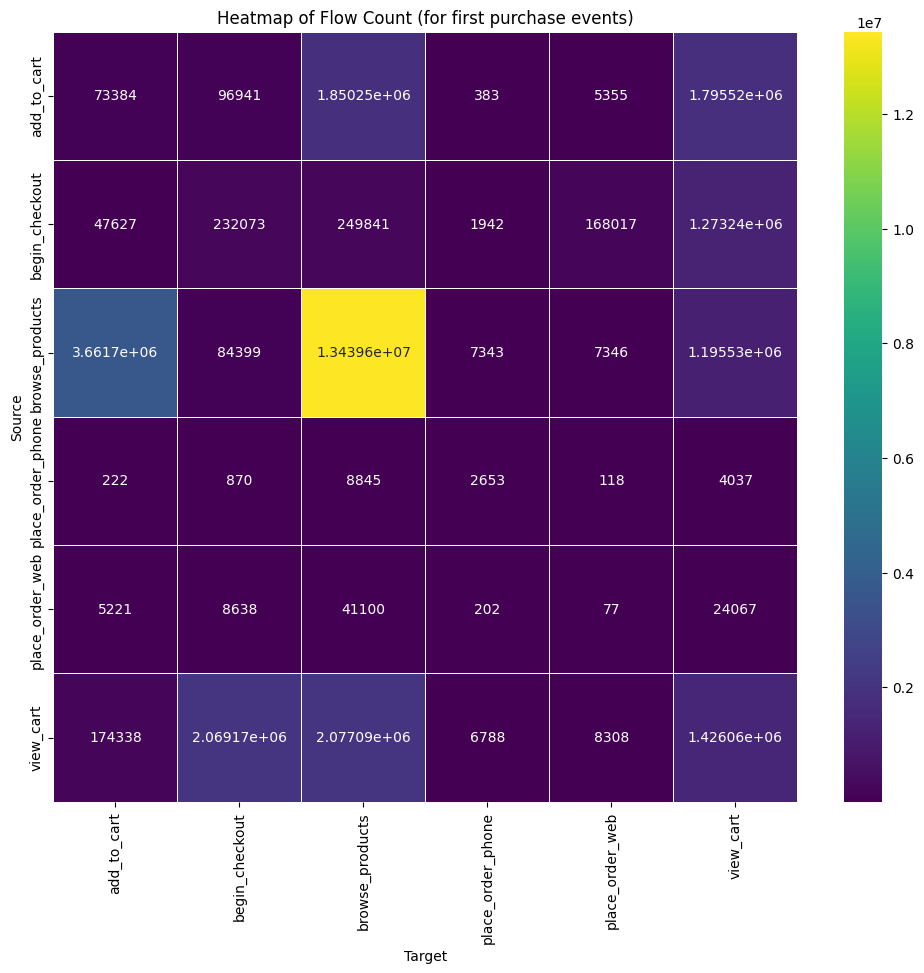

In [ ]:
fp_flow = first_purchase_flow_df.pivot_table(index='source', columns='target', values='value', aggfunc='sum')
fp_flow = fp_flow.fillna(0)
plt.figure(figsize=(12, 10))
sns.heatmap(fp_flow, annot=True, cmap='viridis', fmt='g', linewidths=.5)
plt.title('Heatmap of Flow Count (for first purchase events)')
plt.ylabel('Source')
plt.xlabel('Target')
plt.show()